# Optimal Locator Based On Person Criteria

In [1]:
# Topic:        Project 5
# Subject:      Optimal Locator Based on Person Criteria
# Date:         18/11/2020
# Name:         yalin yener

In [2]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import rcParams
import warnings

In [3]:
# Setting Default Values

warnings.filterwarnings("ignore")
rcParams['figure.figsize']=15,6
rcParams['figure.dpi'] = 150

## Data Wrangling

In [4]:
# Reading Data
london = pd.read_csv("london-borough-profiles.csv",encoding= 'unicode_escape')

#Filtering Data
london = london[1:33]

In [5]:
#Renaming Column Names
london.columns = ['Code','Borough', 'Inner/Outer', 'DE_Population_Estimate',
       'DE_Household_Estimate', 'DE_Inland_Area_(Hectares)',
       'DE_Population_density_(per_hectare)', 'DE_Average_Age',
       'DE_Proportion_of_age_0-15',
       'DE_Proportion_of_of_working-age',
       'DE_Proportion_of_age_65_and_over',
       'DE_Net_internal_migration', 'DE_Net_international_migration',
       'DE_Net_natural_change',
       'DI_%_of_resident_population_born_abroad',
       'DI_Largest_migrant_population_by_country_of_birth',
       'DI_%_of_largest_migrant_population',
       'DI_Second_largest_migrant_population_by_country_of_birth',
       'DI_%_of_second_largest_migrant_population',
       'DI_Third_largest_migrant_population_by_country_of_birth',
       'DI_%_of_third_largest_migrant_population',
       'DI_%_of_population_from_BAME_groups',
       'DI_%_people_aged_3+_whose_main_language_is_not_English',
       'DI_Overseas_nationals_entering_the_UK_(NINo)',
       'DI_New_migrant_(NINo)_rates-',
       'DI_Largest_migrant_population_arrived',
       'DI_Second_largest_migrant_population_arrived',
       'DI_Third_largest_migrant_population_arrived',
       'LM_Employment_rate_(%)', 'LM_Male_employment_rate',
       'LM_Female_employment_rate', 'LM_Unemployment_rate',
       'LM_Youth_Unemployment_(claimant)_rate_18-24',
       'LM_Proportion_of_16-18_year_olds_who_are_NEET_(%)',
       'LM_Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)',
       'LM_%_working-age_with_a_disability',
       'LM_Proportion_of_working_age_people_with_no_qualifications_(%)',
       'LM_Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)',
       'LM_Gross_Annual_Pay,_(2016)', 'LM_Gross_Annual_Pay_-_Male',
       'LM_Gross_Annual_Pay_-_Female',
       'LM_Household_median_income',
       'LM_%_adults_that_volunteered_in_past_12_months',
       'LM_Number_of_jobs_by_workplace',
       'LM_%_of_employment_that_is_in_public_sector', 'LM_Jobs_Density',
       'LM_Number_of_active_businesses',
       'LM_Two-year_business_survival_rates',
       'SA_Crime_rates_per_thousand_population',
       'SA_Fires_per_thousand_population',
       'SA_Ambulance_incidents_per_hundred_population',
       'HO_Median_House_Price',
       'HO_Average_Band_D_Council_Tax_charge_(£)',
       'HO_New_Homes_(net)',
       'HO_Homes_Owned_outright',
       'HO_Being_bought_with_mortgage_or_loan',
       'HO_Rented_from_Local_Authority_or_Housing_Association',
       'HO_Rented_from_Private_landlord',
       'EN_%_of_area_that_is_Greenspace', 'EN_Total_carbon_emission',
       'EN_Household_Waste_Recycling_Rate,',
       'TR_Number_of_cars',
       'TR_Number_of_cars_per_household',
       'TR_%_of_adults_who_cycle_at_least_once_per_month',
       'TR_Average_Public_Transport_Accessibility_score',
       'CH_Achievement_of_5_or_more_A*-_C_grades_at_GCSE',
       'CH_Rates_of_Children_Looked_After',
       'CH_%_of_pupils_whose_first_language_is_not_English',
       'CH_%_children_living_in_out-of-work_households',
       'HE_Male_life_expectancy', 'HE_Female_life_expectancy',
       'HE_Teenage_conception_rate',
       'HE_Life_satisfaction_score',
       'HE_Worthwhileness_score',
       'HE_Happiness_score',
       'HE_Anxiety_score',
       'HE_Childhood_Obesity_Prevalance_(%)',
       'HE_People_aged_17+_with_diabetes',
       'HE_Mortality_rate_from_causes_considered_preventable',
       'PO_Political_control_in_council',
       'PO_Proportion_of_seats_won_by_Conservatives_in_2014_election',
       'PO_Proportion_of_seats_won_by_Labour_in_2014_election',
       'PO_Proportion_of_seats_won_by_Lib_Dems_in_2014_election',
       'PO_Turnout_at_2014_local_elections']

#Creating Criteria data frame
criteria=pd.DataFrame(["demography","diversity","labour_market",
          "safety","housing","environment",
          "transport","children","health"])
criteria.columns=["criteria"]

In [6]:
#Removing columns (unused-unwanted)

london.drop(columns=(['Code',
                      'DE_Household_Estimate', 
                      'DE_Population_density_(per_hectare)',
                      'DE_Proportion_of_of_working-age',
                      'DE_Proportion_of_age_65_and_over', 
                      'DE_Net_internal_migration',
                      'DE_Net_natural_change',
                      'DI_Largest_migrant_population_by_country_of_birth',
                      'DI_Second_largest_migrant_population_by_country_of_birth',
                      'DI_%_of_second_largest_migrant_population',
                      'DI_Third_largest_migrant_population_by_country_of_birth',
                      'DI_%_of_third_largest_migrant_population',
                      'DI_%_of_population_from_BAME_groups',
                      'DI_Overseas_nationals_entering_the_UK_(NINo)',
                      'DI_Largest_migrant_population_arrived',
                      'DI_Second_largest_migrant_population_arrived',
                      'DI_Third_largest_migrant_population_arrived', 
                      'LM_Male_employment_rate', 
                      'LM_Female_employment_rate',
                      'LM_Unemployment_rate', 
                      'LM_Youth_Unemployment_(claimant)_rate_18-24',
                      'LM_Proportion_of_16-18_year_olds_who_are_NEET_(%)',
                      'LM_Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)',
                      'LM_%_working-age_with_a_disability',
                      'LM_Proportion_of_working_age_people_with_no_qualifications_(%)',
                      'LM_Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)',
                      'LM_Gross_Annual_Pay_-_Male',
                      'LM_Gross_Annual_Pay_-_Female',
                      'LM_Gross_Annual_Pay,_(2016)',
                      'LM_%_of_employment_that_is_in_public_sector', 
                      'LM_Jobs_Density',
                      'LM_Two-year_business_survival_rates',
                      'HO_Homes_Owned_outright',
                      'HO_Being_bought_with_mortgage_or_loan',
                      'HO_Rented_from_Local_Authority_or_Housing_Association',
                      'HO_Rented_from_Private_landlord', 
                      'TR_Number_of_cars_per_household',
                      'HE_Teenage_conception_rate', 
                      'HE_Childhood_Obesity_Prevalance_(%)',
                      'HE_People_aged_17+_with_diabetes',
                      'PO_Political_control_in_council',
                      'PO_Proportion_of_seats_won_by_Conservatives_in_2014_election',
                      'PO_Proportion_of_seats_won_by_Labour_in_2014_election',
                      'PO_Proportion_of_seats_won_by_Lib_Dems_in_2014_election',
                      'PO_Turnout_at_2014_local_elections']) ,inplace=True)

In [7]:
#Removing special characters (',' '£'') for columns

london['DE_Inland_Area_(Hectares)']=london['DE_Inland_Area_(Hectares)'].str.replace(",","")
london['LM_Household_median_income']=london['LM_Household_median_income'].str.replace("£","")
london['LM_Household_median_income']=london['LM_Household_median_income'].str.replace(",","")

In [8]:
# converting to int types

cols_to_convert_int = ['DE_Population_Estimate',
                       'DE_Inland_Area_(Hectares)',
                       'DE_Net_international_migration',
                       'LM_Number_of_jobs_by_workplace', 
                       'LM_Number_of_active_businesses',
                       'LM_Household_median_income',
                       'HO_Median_House_Price',
                       'HO_New_Homes_(net)', 
                       'EN_Total_carbon_emission', 
                       'TR_Number_of_cars']

for col in cols_to_convert_int:
    london[col] = london[col].astype("int")

In [9]:
# converting to float types

cols_to_convert_int = ['DE_Average_Age',
                       'DE_Proportion_of_age_0-15', 
                       'DI_%_of_resident_population_born_abroad',
                       'DI_%_of_largest_migrant_population',
                       'DI_%_people_aged_3+_whose_main_language_is_not_English',
                       'DI_New_migrant_(NINo)_rates-', 
                       'LM_Employment_rate_(%)',
                       'LM_%_adults_that_volunteered_in_past_12_months',
                       'SA_Crime_rates_per_thousand_population',
                       'SA_Fires_per_thousand_population',
                       'SA_Ambulance_incidents_per_hundred_population',
                       'HO_Average_Band_D_Council_Tax_charge_(£)',
                       'EN_%_of_area_that_is_Greenspace',
                       'EN_Household_Waste_Recycling_Rate,',
                       'TR_%_of_adults_who_cycle_at_least_once_per_month',
                       'TR_Average_Public_Transport_Accessibility_score',
                       'CH_Achievement_of_5_or_more_A*-_C_grades_at_GCSE',
                       'CH_Rates_of_Children_Looked_After',
                       'CH_%_of_pupils_whose_first_language_is_not_English',
                       'CH_%_children_living_in_out-of-work_households',
                       'HE_Male_life_expectancy', 
                       'HE_Female_life_expectancy',
                       'HE_Life_satisfaction_score', 
                       'HE_Worthwhileness_score',
                       'HE_Happiness_score', 'HE_Anxiety_score',
                       'HE_Mortality_rate_from_causes_considered_preventable'
                      ]

for col in cols_to_convert_int:
    london[col] = london[col].astype("float")

In [10]:
#Checking column types
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 1 to 32
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Borough                                                 32 non-null     object 
 1   Inner/Outer                                             32 non-null     object 
 2   DE_Population_Estimate                                  32 non-null     int64  
 3   DE_Inland_Area_(Hectares)                               32 non-null     int64  
 4   DE_Average_Age                                          32 non-null     float64
 5   DE_Proportion_of_age_0-15                               32 non-null     float64
 6   DE_Net_international_migration                          32 non-null     int64  
 7   DI_%_of_resident_population_born_abroad                 32 non-null     float64
 8   DI_%_of_largest_migrant_population        

In [11]:
#Descriptive Statistics
round(london.describe().T,2)

count       mean  \
DE_Population_Estimate                               32.0  275831.25   
DE_Inland_Area_(Hectares)                            32.0    4903.84   
DE_Average_Age                                       32.0      36.16   
DE_Proportion_of_age_0-15                            32.0      20.23   
DE_Net_international_migration                       32.0    4163.62   
DI_%_of_resident_population_born_abroad              32.0      36.51   
DI_%_of_largest_migrant_population                   32.0       4.76   
DI_%_people_aged_3+_whose_main_language_is_not_...   32.0      21.78   
DI_New_migrant_(NINo)_rates-                         32.0      52.30   
LM_Employment_rate_(%)                               32.0      72.97   
LM_Household_median_income                           32.0   38892.81   
LM_%_adults_that_volunteered_in_past_12_months       32.0      26.77   
LM_Number_of_jobs_by_workplace                       32.0  160396.88   
LM_Number_of_active_businesses                       32.0   16099.38   
SA_Crime_rates_per_thousand_population               32.0      84.87   
SA_Fires_per_thousand_population                     32.0       2.28   
SA_Ambulance_incidents_per_hundred_population        32.0      12.29   
HO_Median_House_Price                                32.0  455013.88   
HO_Average_Band_D_Council_Tax_charge_(£)             32.0    1327.85   
HO_New_Homes_(net)                                   32.0     947.19   
EN_%_of_area_that_is_Greenspace                      32.0      32.24   
EN_Total_carbon_emission                             32.0    1086.88   
EN_Household_Waste_Recycling_Rate,                   32.0      33.32   
TR_Number_of_cars                                    32.0   83210.06   
TR_%_of_adults_who_cycle_at_least_once_per_month     32.0      15.02   
TR_Average_Public_Transport_Accessibility_score      32.0       3.83   
CH_Achievement_of_5_or_more_A*-_C_grades_at_GCSE     32.0      62.35   
CH_Rates_of_Children_Looked_After                    32.0      49.94   
CH_%_of_pupils_whose_first_language_is_not_English   32.0      44.88   
CH_%_children_living_in_out-of-work_households       32.0      14.28   
HE_Male_life_expectancy                              32.0      80.28   
HE_Female_life_expectancy                            32.0      84.23   
HE_Life_satisfaction_score                           32.0       7.30   
HE_Worthwhileness_score                              32.0       7.58   
HE_Happiness_score                                   32.0       7.25   
HE_Anxiety_score                                     32.0       3.29   
HE_Mortality_rate_from_causes_considered_preven...   32.0     173.34   

                                                          std        min  \
DE_Population_Estimate                               60294.93  159000.00   
DE_Inland_Area_(Hectares)                             3221.45    1212.00   
DE_Average_Age                                           2.20      31.40   
DE_Proportion_of_age_0-15                                2.33      15.90   
DE_Net_international_migration                        2944.26     568.00   
DI_%_of_resident_population_born_abroad                 10.50      10.90   
DI_%_of_largest_migrant_population                       3.13       1.10   
DI_%_people_aged_3+_whose_main_language_is_not_...       8.97       4.60   
DI_New_migrant_(NINo)_rates-                            24.10      14.40   
LM_Employment_rate_(%)                                   4.02      65.60   
LM_Household_median_income                            6109.02   28780.00   
LM_%_adults_that_volunteered_in_past_12_months           7.99       8.40   
LM_Number_of_jobs_by_workplace                      125875.18   58900.00   
LM_Number_of_active_businesses                        8803.22    6560.00   
SA_Crime_rates_per_thousand_population                  31.13      50.40   
SA_Fires_per_thousand_population                         0.56       1.30   
SA_Ambulance_incidents_

## Exploratory Data Analysis

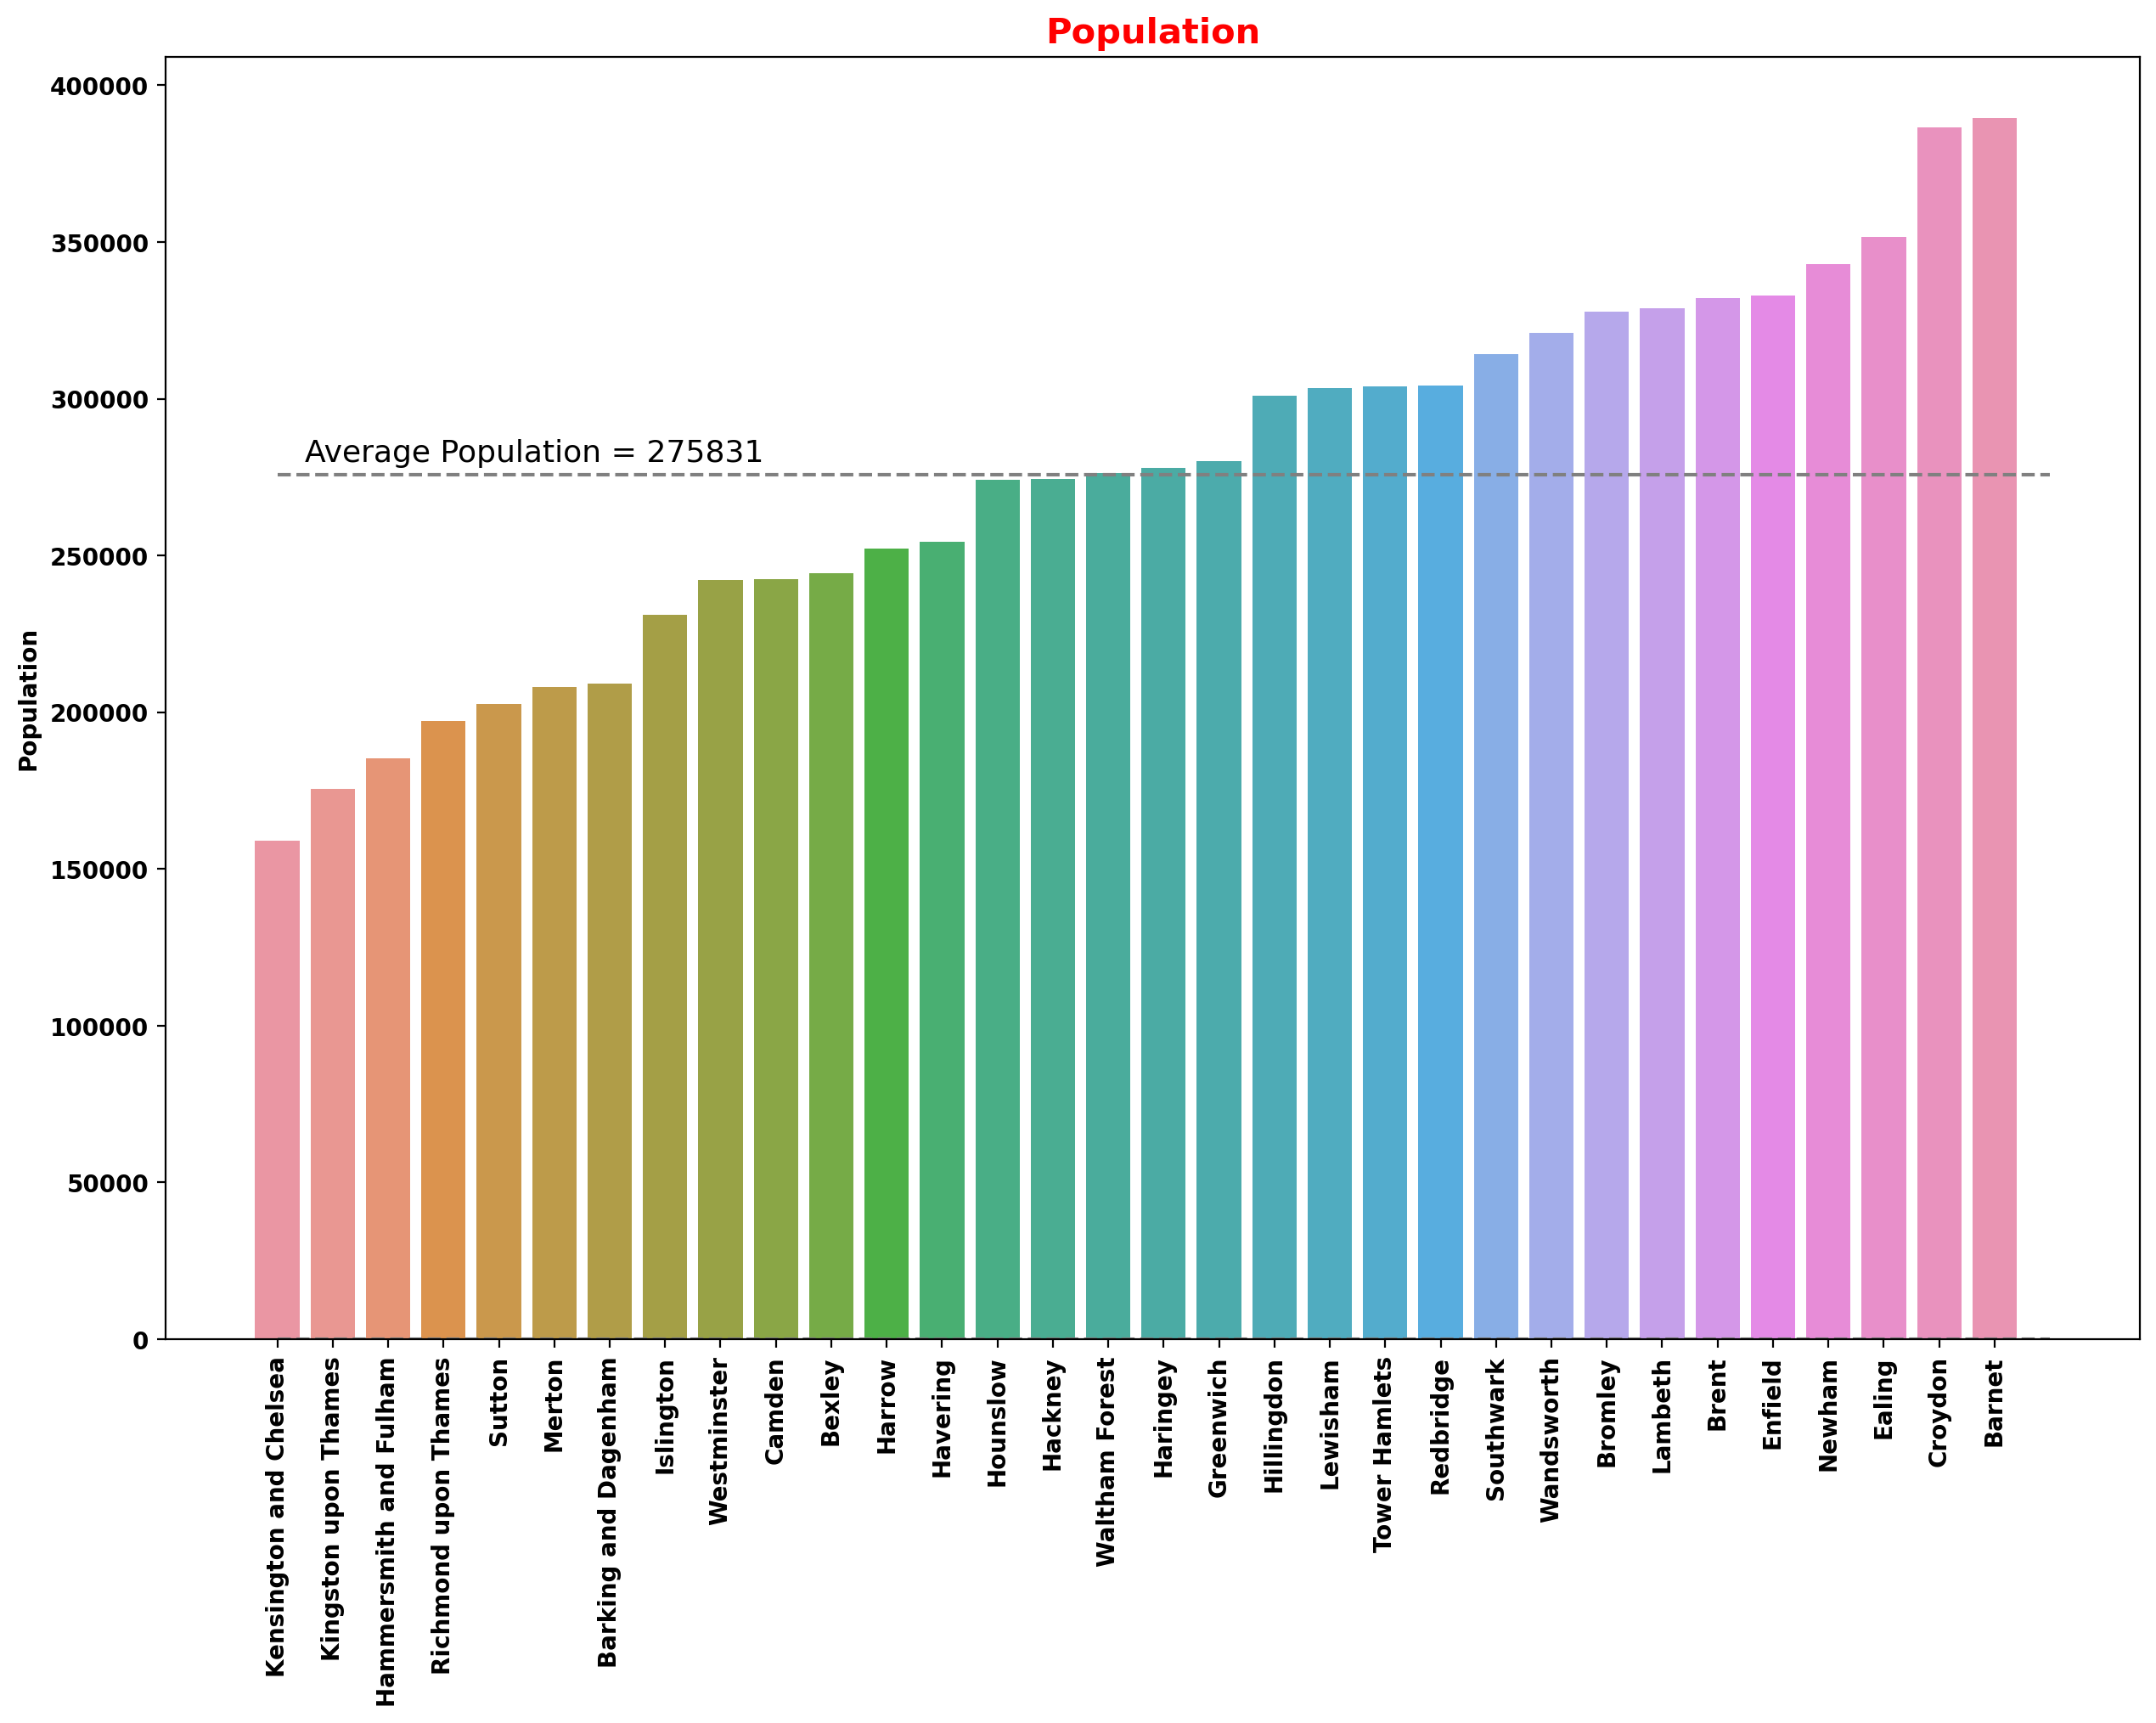

In [12]:
# Bar Plot For Population

london_sort_population = london.sort_values("DE_Population_Estimate")
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="Borough", y="DE_Population_Estimate", data=london_sort_population)
plt.title("Population", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Population",weight= "bold",c="k")
plt.yticks(weight="bold")
#for p in ax.patches:
 #       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
  #                  ha='center', va='bottom',
   #                 color= 'black', size=8)
        
x_coordinates = [0, 32]
y_median = [(london["DE_Population_Estimate"].mean(),2), (london["DE_Population_Estimate"].mean(),2)]

plt.plot(x_coordinates, y_median,linestyle = '--', c="gray")
plt.text(.5,280000,'Average Population = 275831',fontsize = 13,color = 'black')
plt.show()

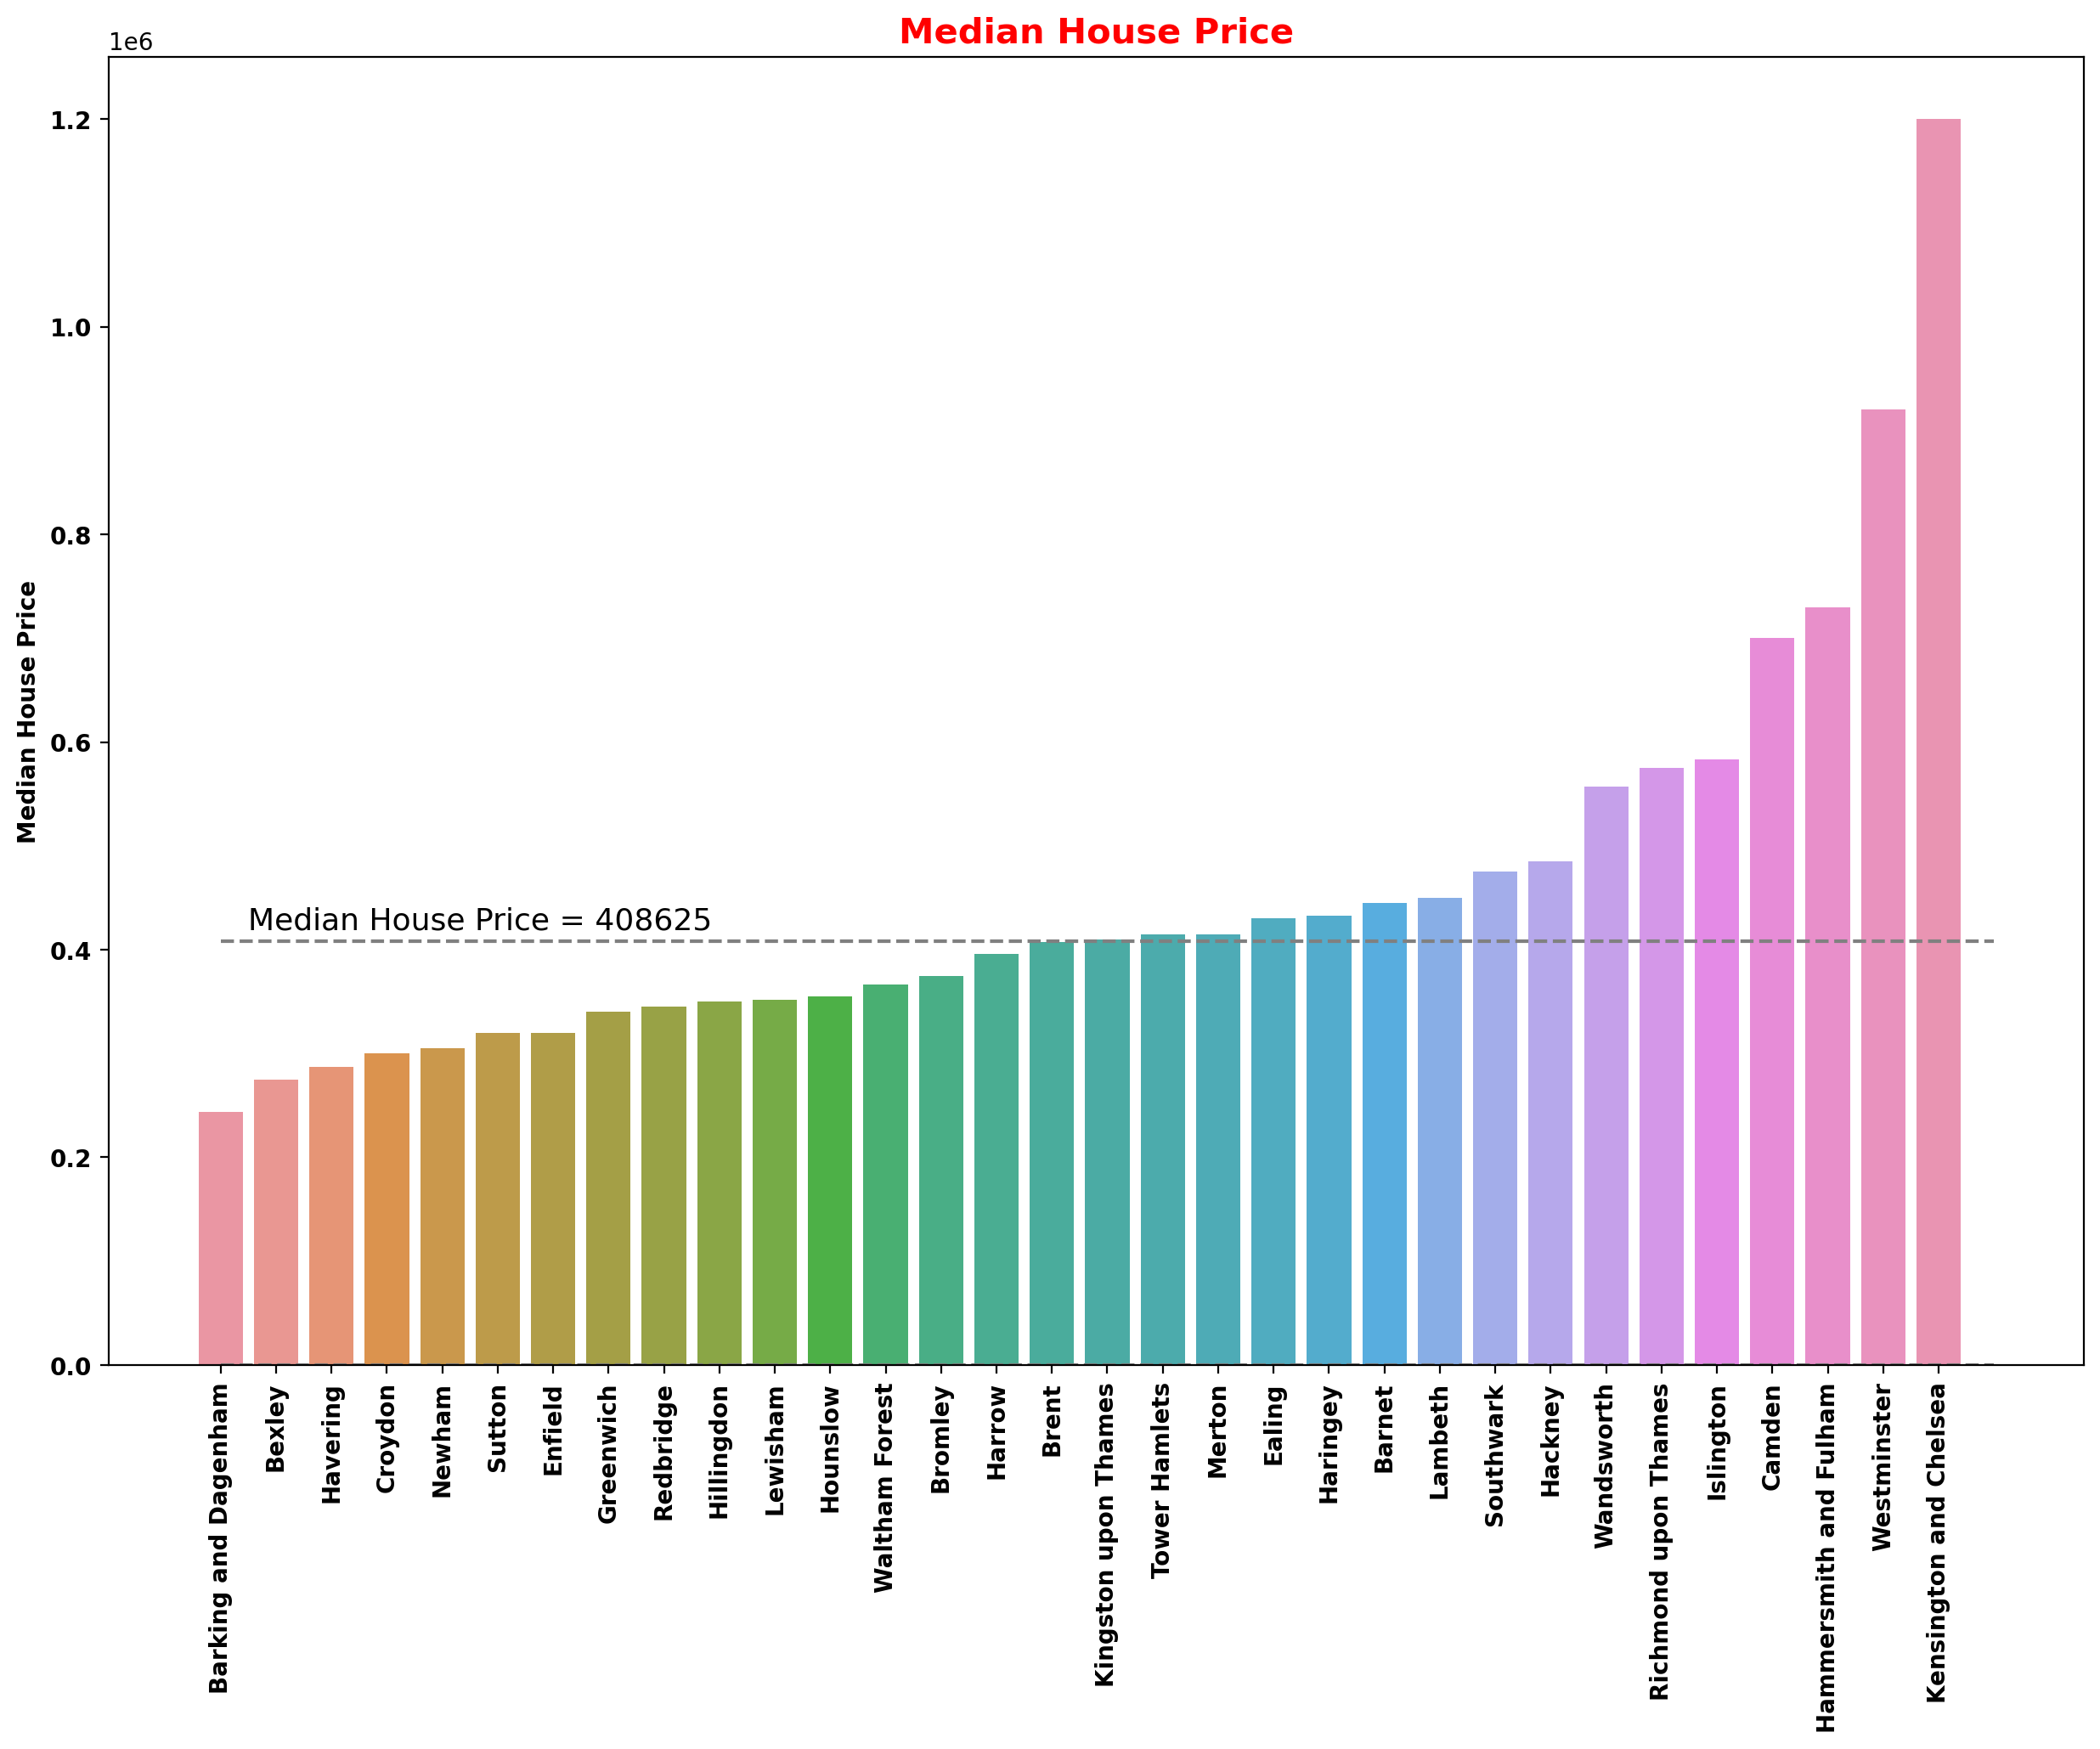

In [13]:
# Bar Plot For House Price

london_sort_housePrice = london.sort_values("HO_Median_House_Price")
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="Borough", y="HO_Median_House_Price", data=london_sort_housePrice)
plt.title("Median House Price", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=90, weight="bold")
plt.ylabel("Median House Price",weight= "bold",c="k")
plt.yticks(weight="bold")
#for p in ax.patches:
 #       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
  #                  ha='center', va='bottom',
   #                 color= 'black', size=8)
        
x_coordinates = [0, 32]
y_median = [(london["HO_Median_House_Price"].median(),2), (london["HO_Median_House_Price"].median(),2)]

plt.plot(x_coordinates, y_median,linestyle = '--', c="gray")
plt.text(.5,420000,'Median House Price = 408625',fontsize = 13,color = 'black')
plt.show()

## Resample all values between 1 and 2

In [14]:
#set index Borough name
london = london.set_index('Borough')

### Criteria-1: Demograhpy

In [15]:
#Resamling Demography Criteria
london["DE.Ind_Pop"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,1].values.reshape(-1,1))*-1)
london["DE.Ind_InlAre"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,2].values.reshape(-1,1)))
london["DE.Ind_AvgAge"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,3].values.reshape(-1,1))*-1)
london["DE.Ind_Age_0_15"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,4].values.reshape(-1,1)))
london["DE.Ind_Mig"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,5].values.reshape(-1,1))*-1)

#Filtering Demography columns
col_list_DE = london.columns[london.columns.str.contains('DE_')]
col_list_DE_Ind = london.columns[london.columns.str.contains('DE.Ind')] 

#Creating Demografy Data Frame
london_DE = london[col_list_DE]
london_DE_Ind = london[col_list_DE_Ind]

round(london_DE_Ind,2)

DE.Ind_Pop  DE.Ind_InlAre  DE.Ind_AvgAge  \
Borough                                                            
Barking and Dagenham          0.57          -0.65           0.66   
Barnet                       -1.00           0.08          -0.33   
Bexley                        0.26          -0.30          -0.71   
Brent                        -0.50          -0.55           0.06   
Bromley                      -0.46           1.00          -0.98   
Camden                        0.28          -0.86          -0.12   
Croydon                      -0.97           0.08          -0.26   
Ealing                       -0.67          -0.37          -0.08   
Enfield                      -0.51          -0.00          -0.10   
Greenwich                    -0.05          -0.49           0.19   
Hackney                      -0.00          -0.90           0.62   
Hammersmith and Fulham        0.77          -0.94           0.03   
Haringey                     -0.03          -0.75           0.17   
Harrow                        0.19          -0.44          -0.55   
Havering                      0.17           0.45          -1.00   
Hillingdon                   -0.23           0.50          -0.12   
Hounslow                      0.00          -0.36           0.01   
Islington                     0.37          -0.96           0.24   
Kensington and Chelsea        1.00          -1.00          -0.78   
Kingston upon Thames          0.86          -0.64          -0.28   
Lambeth                      -0.47          -0.79           0.30   
Lewisham                     -0.25          -0.67           0.19   
Merton                        0.57          -0.63          -0.19   
Newham                       -0.59          -0.65           0.84   
Redbridge                    -0.26          -0.36           0.01   
Richmond upon Thames          0.67          -0.34          -0.66   
Southwark                    -0.35          -0.76           0.33   
Sutton                        0.62          -0.54          -0.69   
Tower Hamlets                -0.26          -0.89           1.00   
Waltham Forest               -0.02          -0.61           0.17   
Wandsworth                   -0.41          -0.68           0.19   
Westminster                   0.28          -0.86          -0.42   

                        DE.Ind_Age_0_15  DE.Ind_Mig  
Borough                                              
Barking and Dagenham               1.00        0.63  
Barnet                            -0.08        0.09  
Bexley                            -0.17        0.96  
Brent                             -0.12       -0.33  
Bromley                           -0.29        0.96  
Camden                            -0.75       -0.31  
Croydon                            0.08        0.65  
Ealing                            -0.03        0.35  
Enfield                            0.22        0.51  
Greenwich                          0.06        0.47  
Hackney                           -0.15        0.47  
Hammersmith and Fulham            -0.73        0.56  
Haringey                          -0.27       -0.15  
Harrow                            -0.19        0.57  
Havering                          -0.40        0.99  
Hillingdon                        -0.04        0.33  
Hounslow                          -0.08        0.27  
Islington                         -1.00       -0.08  
Kensington and Chelsea            -0.91        0.69  
Kingston upon Thames              -0.35        0.63  
Lambeth                           -0.70        0.24  
Lewisham                          -0.17        0.41  
Merton                            -0.17        0.90  
Newham                             0.20       -1.00  
Redbridge                          0.22        0.41  
Richmond upon Thames              -0.15        0.93  
Southwark                         -0.52        0.07  
Sutton                            -0.15        1.00  
Tower Hamlets                     -0.26       -0.88  
Waltham Forest                     0.

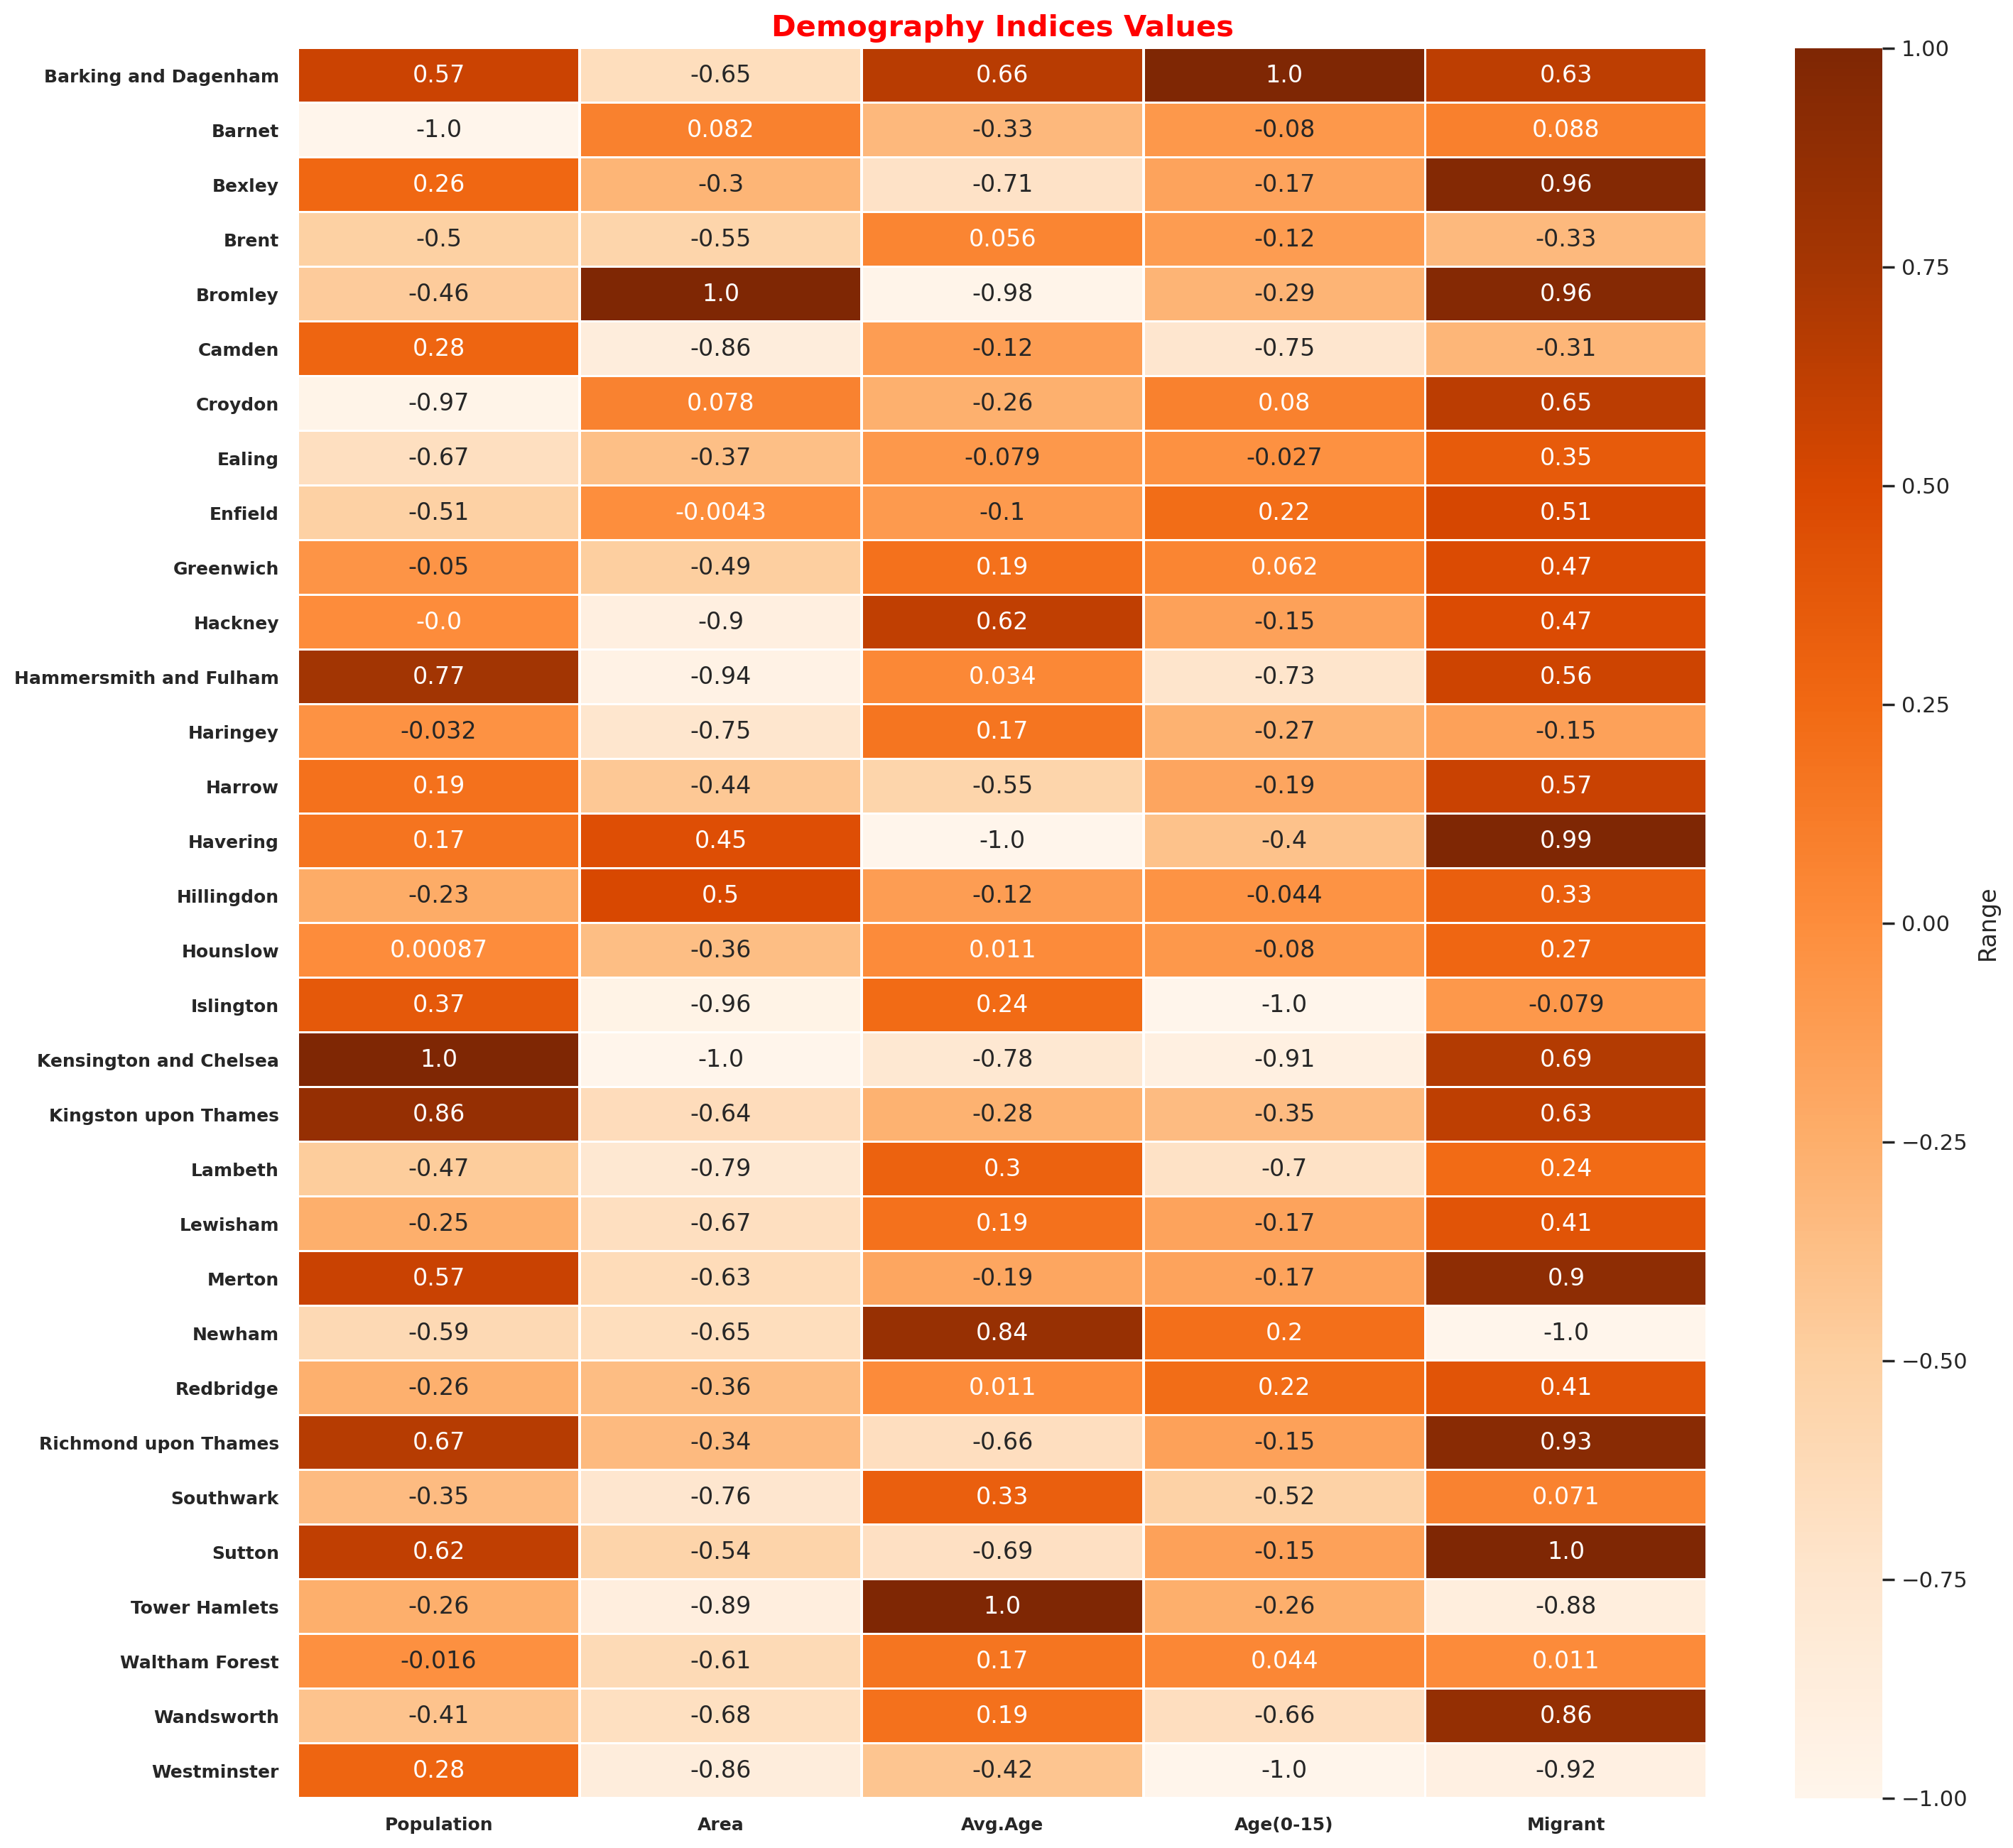

In [16]:
# Heatmap for Demography Criteria

plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(london_DE_Ind,annot=True,fmt=".2", linewidths=1, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5,4.5],["Population","Area","Avg.Age","Age(0-15)","Migrant"],weight="bold",rotation=0,size=9)
plt.title("Demography Indices Values",weight="bold",c="red", fontsize=15)
plt.show()

london_DE_Ind["DE_Total"] = london_DE_Ind.sum(axis=1)

In [17]:
round(london_DE_Ind,2)

DE.Ind_Pop  DE.Ind_InlAre  DE.Ind_AvgAge  \
Borough                                                            
Barking and Dagenham          0.57          -0.65           0.66   
Barnet                       -1.00           0.08          -0.33   
Bexley                        0.26          -0.30          -0.71   
Brent                        -0.50          -0.55           0.06   
Bromley                      -0.46           1.00          -0.98   
Camden                        0.28          -0.86          -0.12   
Croydon                      -0.97           0.08          -0.26   
Ealing                       -0.67          -0.37          -0.08   
Enfield                      -0.51          -0.00          -0.10   
Greenwich                    -0.05          -0.49           0.19   
Hackney                      -0.00          -0.90           0.62   
Hammersmith and Fulham        0.77          -0.94           0.03   
Haringey                     -0.03          -0.75           0.17   
Harrow                        0.19          -0.44          -0.55   
Havering                      0.17           0.45          -1.00   
Hillingdon                   -0.23           0.50          -0.12   
Hounslow                      0.00          -0.36           0.01   
Islington                     0.37          -0.96           0.24   
Kensington and Chelsea        1.00          -1.00          -0.78   
Kingston upon Thames          0.86          -0.64          -0.28   
Lambeth                      -0.47          -0.79           0.30   
Lewisham                     -0.25          -0.67           0.19   
Merton                        0.57          -0.63          -0.19   
Newham                       -0.59          -0.65           0.84   
Redbridge                    -0.26          -0.36           0.01   
Richmond upon Thames          0.67          -0.34          -0.66   
Southwark                    -0.35          -0.76           0.33   
Sutton                        0.62          -0.54          -0.69   
Tower Hamlets                -0.26          -0.89           1.00   
Waltham Forest               -0.02          -0.61           0.17   
Wandsworth                   -0.41          -0.68           0.19   
Westminster                   0.28          -0.86          -0.42   

                        DE.Ind_Age_0_15  DE.Ind_Mig  
Borough                                              
Barking and Dagenham               1.00        0.63  
Barnet                            -0.08        0.09  
Bexley                            -0.17        0.96  
Brent                             -0.12       -0.33  
Bromley                           -0.29        0.96  
Camden                            -0.75       -0.31  
Croydon                            0.08        0.65  
Ealing                            -0.03        0.35  
Enfield                            0.22        0.51  
Greenwich                          0.06        0.47  
Hackney                           -0.15        0.47  
Hammersmith and Fulham            -0.73        0.56  
Haringey                          -0.27       -0.15  
Harrow                            -0.19        0.57  
Havering                          -0.40        0.99  
Hillingdon                        -0.04        0.33  
Hounslow                          -0.08        0.27  
Islington                         -1.00       -0.08  
Kensington and Chelsea            -0.91        0.69  
Kingston upon Thames              -0.35        0.63  
Lambeth                           -0.70        0.24  
Lewisham                          -0.17        0.41  
Merton                            -0.17        0.90  
Newham                             0.20       -1.00  
Redbridge                          0.22        0.41  
Richmond upon Thames              -0.15        0.93  
Southwark                         -0.52        0.07  
Sutton                            -0.15        1.00  
Tower Hamlets                     -0.26       -0.88  
Waltham Forest                     0.

In [18]:
#AHP for Demography
london_DE_Ind_Weight = [4.6,26.4,9.8,15.5,43.6]
london_DE_Ind["Total"] = ((london_DE_Ind["DE.Ind_Pop"]*london_DE_Ind_Weight[0])+
                        (london_DE_Ind["DE.Ind_InlAre"]*london_DE_Ind_Weight[1])+
                        (london_DE_Ind["DE.Ind_AvgAge"]*london_DE_Ind_Weight[2])+
                        (london_DE_Ind["DE.Ind_Age_0_15"]*london_DE_Ind_Weight[3])+
                        (london_DE_Ind["DE.Ind_Mig"]*london_DE_Ind_Weight[4]))

london_DE_Ind["Total"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london_DE_Ind.iloc[:,5].values.reshape(-1,1)))


round(london_DE_Ind,2)

DE.Ind_Pop  DE.Ind_InlAre  DE.Ind_AvgAge  \
Borough                                                            
Barking and Dagenham          0.57          -0.65           0.66   
Barnet                       -1.00           0.08          -0.33   
Bexley                        0.26          -0.30          -0.71   
Brent                        -0.50          -0.55           0.06   
Bromley                      -0.46           1.00          -0.98   
Camden                        0.28          -0.86          -0.12   
Croydon                      -0.97           0.08          -0.26   
Ealing                       -0.67          -0.37          -0.08   
Enfield                      -0.51          -0.00          -0.10   
Greenwich                    -0.05          -0.49           0.19   
Hackney                      -0.00          -0.90           0.62   
Hammersmith and Fulham        0.77          -0.94           0.03   
Haringey                     -0.03          -0.75           0.17   
Harrow                        0.19          -0.44          -0.55   
Havering                      0.17           0.45          -1.00   
Hillingdon                   -0.23           0.50          -0.12   
Hounslow                      0.00          -0.36           0.01   
Islington                     0.37          -0.96           0.24   
Kensington and Chelsea        1.00          -1.00          -0.78   
Kingston upon Thames          0.86          -0.64          -0.28   
Lambeth                      -0.47          -0.79           0.30   
Lewisham                     -0.25          -0.67           0.19   
Merton                        0.57          -0.63          -0.19   
Newham                       -0.59          -0.65           0.84   
Redbridge                    -0.26          -0.36           0.01   
Richmond upon Thames          0.67          -0.34          -0.66   
Southwark                    -0.35          -0.76           0.33   
Sutton                        0.62          -0.54          -0.69   
Tower Hamlets                -0.26          -0.89           1.00   
Waltham Forest               -0.02          -0.61           0.17   
Wandsworth                   -0.41          -0.68           0.19   
Westminster                   0.28          -0.86          -0.42   

                        DE.Ind_Age_0_15  DE.Ind_Mig  Total  
Borough                                                     
Barking and Dagenham               1.00        0.63   0.75  
Barnet                            -0.08        0.09   0.18  
Bexley                            -0.17        0.96   0.61  
Brent                             -0.12       -0.33  -0.27  
Bromley                           -0.29        0.96   1.00  
Camden                            -0.75       -0.31  -0.50  
Croydon                            0.08        0.65   0.59  
Ealing                            -0.03        0.35   0.24  
Enfield                            0.22        0.51   0.55  
Greenwich                          0.06        0.47   0.38  
Hackney                           -0.15        0.47   0.23  
Hammersmith and Fulham            -0.73        0.56   0.10  
Haringey                          -0.27       -0.15  -0.22  
Harrow                            -0.19        0.57   0.31  
Havering                          -0.40        0.99   0.82  
Hillingdon                        -0.04        0.33   0.59  
Hounslow                          -0.08        0.27   0.24  
Islington                         -1.00       -0.08  -0.38  
Kensington and Chelsea            -0.91        0.69   0.02  
Kingston upon Thames              -0.35        0.63   0.32  
Lambeth                           -0.70        0.24  -0.08  
Lewisham                          -0.17        0.41   0.20  
Merton                            -0.17        0.90   0.54  
Newham                             0.20       -1.00  -0.56  
Redbridge                          0.22        0.41   0.38  
Richmond upon Thames              -0.15        0.93   0.61  
Sou

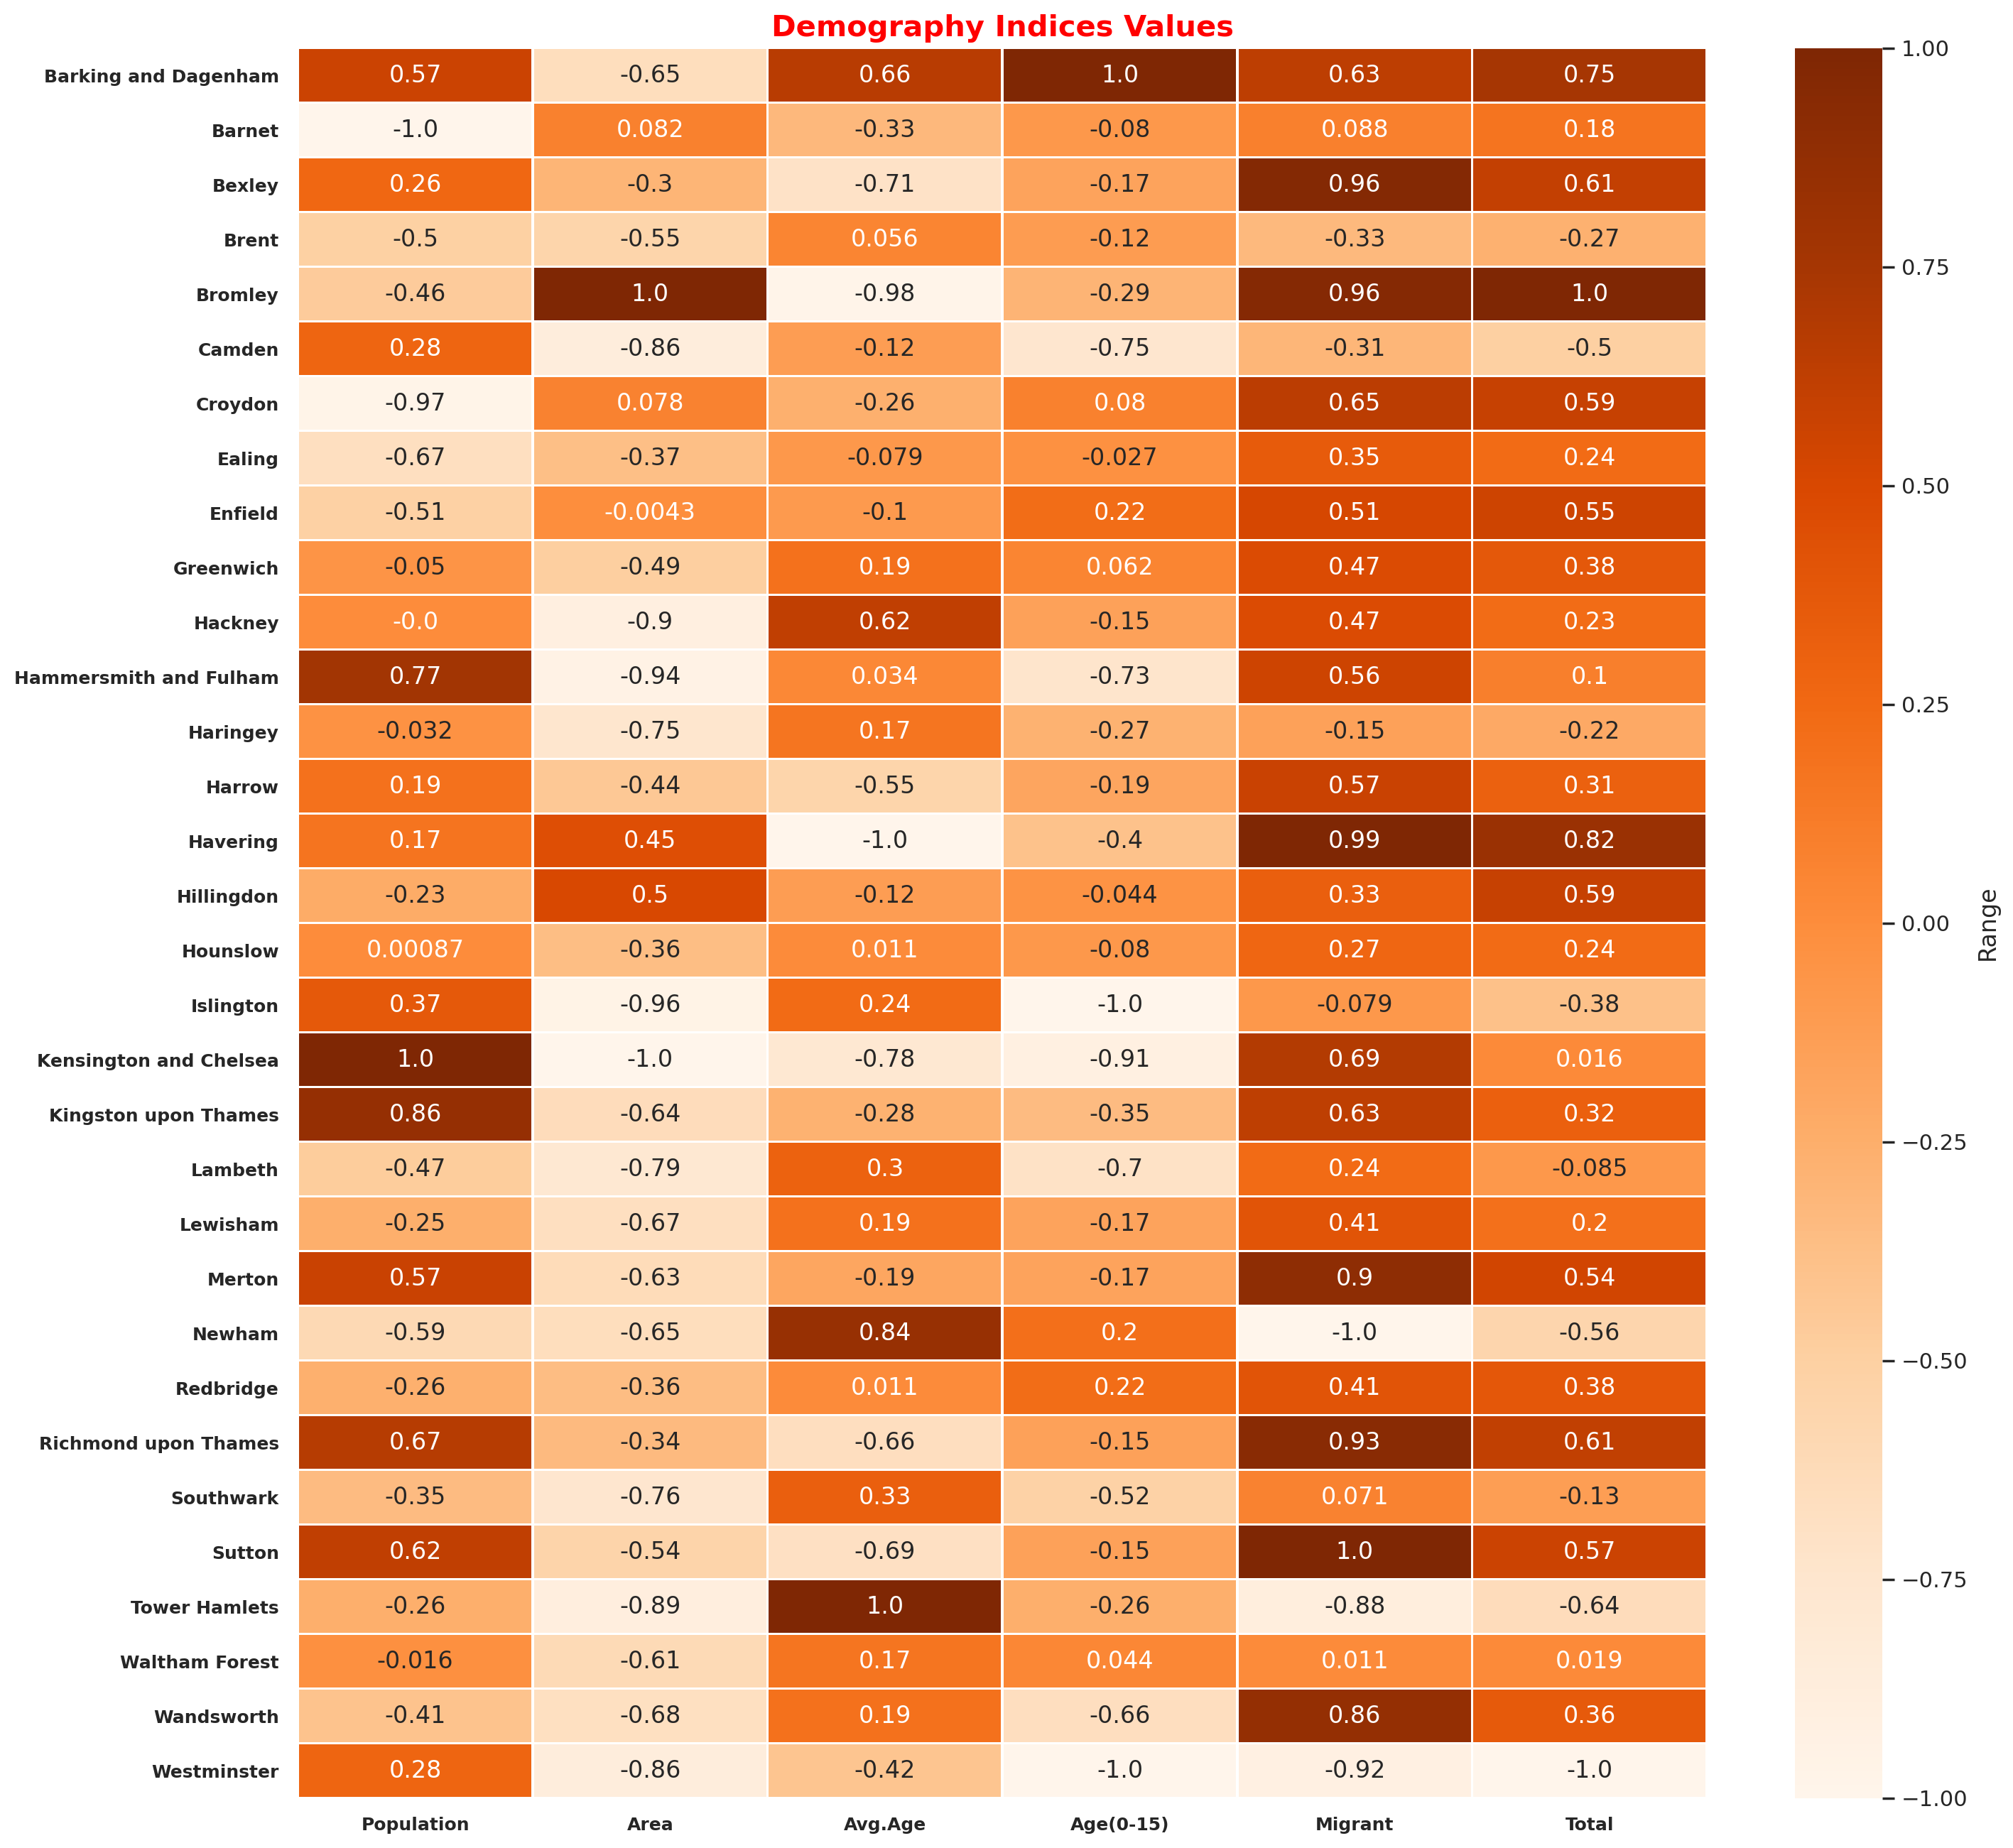

In [19]:
# Heatmap for Demography Criteria_Weighted

plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(london_DE_Ind,annot=True,fmt=".2", linewidths=1, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5],["Population","Area","Avg.Age","Age(0-15)","Migrant","Total"],weight="bold",rotation=0,size=9)
plt.title("Demography Indices Values",weight="bold",c="red", fontsize=15)
plt.show()

### Criteria-1: Diversity


In [30]:
#Resamling Diversity Criteria
london["DI.Ind_BornAbroad"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,6].values.reshape(-1,1))*-1)
london["DI.Ind_LarMigPop"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,7].values.reshape(-1,1))*-1)
london["DI.Ind_MaiLanNotEng"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,8].values.reshape(-1,1))*-1)
london["DI.Ind_NewMigr"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,9].values.reshape(-1,1))*-1)

#Filtering Diversity columns
col_list_DI = london.columns[london.columns.str.contains('DI_')]
col_list_DI_Ind = london.columns[london.columns.str.contains('DI.Ind')] 

#Creating Diversity Data Frame
london_DI = london[col_list_DI]
london_DI_Ind = london[col_list_DI_Ind]

round(london_DI_Ind,2)

DI.Ind_BornAbroad  DI.Ind_LarMigPop  \
Borough                                                       
Barking and Dagenham                -0.25              0.49   
Barnet                              -0.12              0.72   
Bexley                               0.76              0.79   
Brent                               -0.99             -0.14   
Bromley                              0.66              1.00   
Camden                              -0.41              0.76   
Croydon                              0.14              0.65   
Ealing                              -0.69              0.08   
Enfield                             -0.12              0.52   
Greenwich                           -0.13              0.44   
Hackney                             -0.15              0.65   
Hammersmith and Fulham              -0.50              0.77   
Haringey                            -0.33              0.55   
Harrow                              -0.79             -0.11   
Havering                             1.00              1.00   
Hillingdon                           0.00              0.35   
Hounslow                            -0.64             -0.35   
Islington                           -0.19              0.76   
Kensington and Chelsea              -0.90              0.45   
Kingston upon Thames                 0.13              0.85   
Lambeth                              0.01              0.70   
Lewisham                            -0.11              0.66   
Merton                              -0.23              0.66   
Newham                              -1.00             -0.07   
Redbridge                           -0.36              0.08   
Richmond upon Thames                 0.41              0.90   
Southwark                           -0.27              0.49   
Sutton                               0.44              0.90   
Tower Hamlets                       -0.28             -1.00   
Waltham Forest                      -0.22              0.46   
Wandsworth                          -0.01              0.85   
Westminster                         -0.80              0.65   

                        DI.Ind_MaiLanNotEng  DI.Ind_NewMigr  
Borough                                                      
Barking and Dagenham                   0.23            0.06  
Barnet                                -0.02            0.19  
Bexley                                 0.92            1.00  
Brent                                 -0.77           -0.82  
Bromley                                0.93            1.00  
Camden                                -0.03            0.03  
Croydon                                0.46            0.62  
Ealing                                -0.59           -0.07  
Enfield                                0.01            0.38  
Greenwich                              0.33            0.51  
Hackney                               -0.06            0.34  
Hammersmith and Fulham                 0.02           -0.20  
Haringey                              -0.36           -0.35  
Harrow                                -0.30           -0.07  
Havering                               1.00            0.95  
Hillingdon                             0.23            0.55  
Hounslow                              -0.31           -0.01  
Islington                              0.17            0.16  
Kensington and Chelsea                -0.27           -0.09  
Kingston upon Thames                   0.36            0.72  
Lambeth                                0.15            0.33  
Lewisham                               0.35            0.50  
Merton                                 0.10            0.28  
Newham                                -1.00           -1.00  
Redbridge                             -0.09            0.16  
Richmond upon Thames                   0.68            0.87  
Southwark                              0.18            0.18  
Sutton                                 0.71            0.96  
Tower Hamlets        

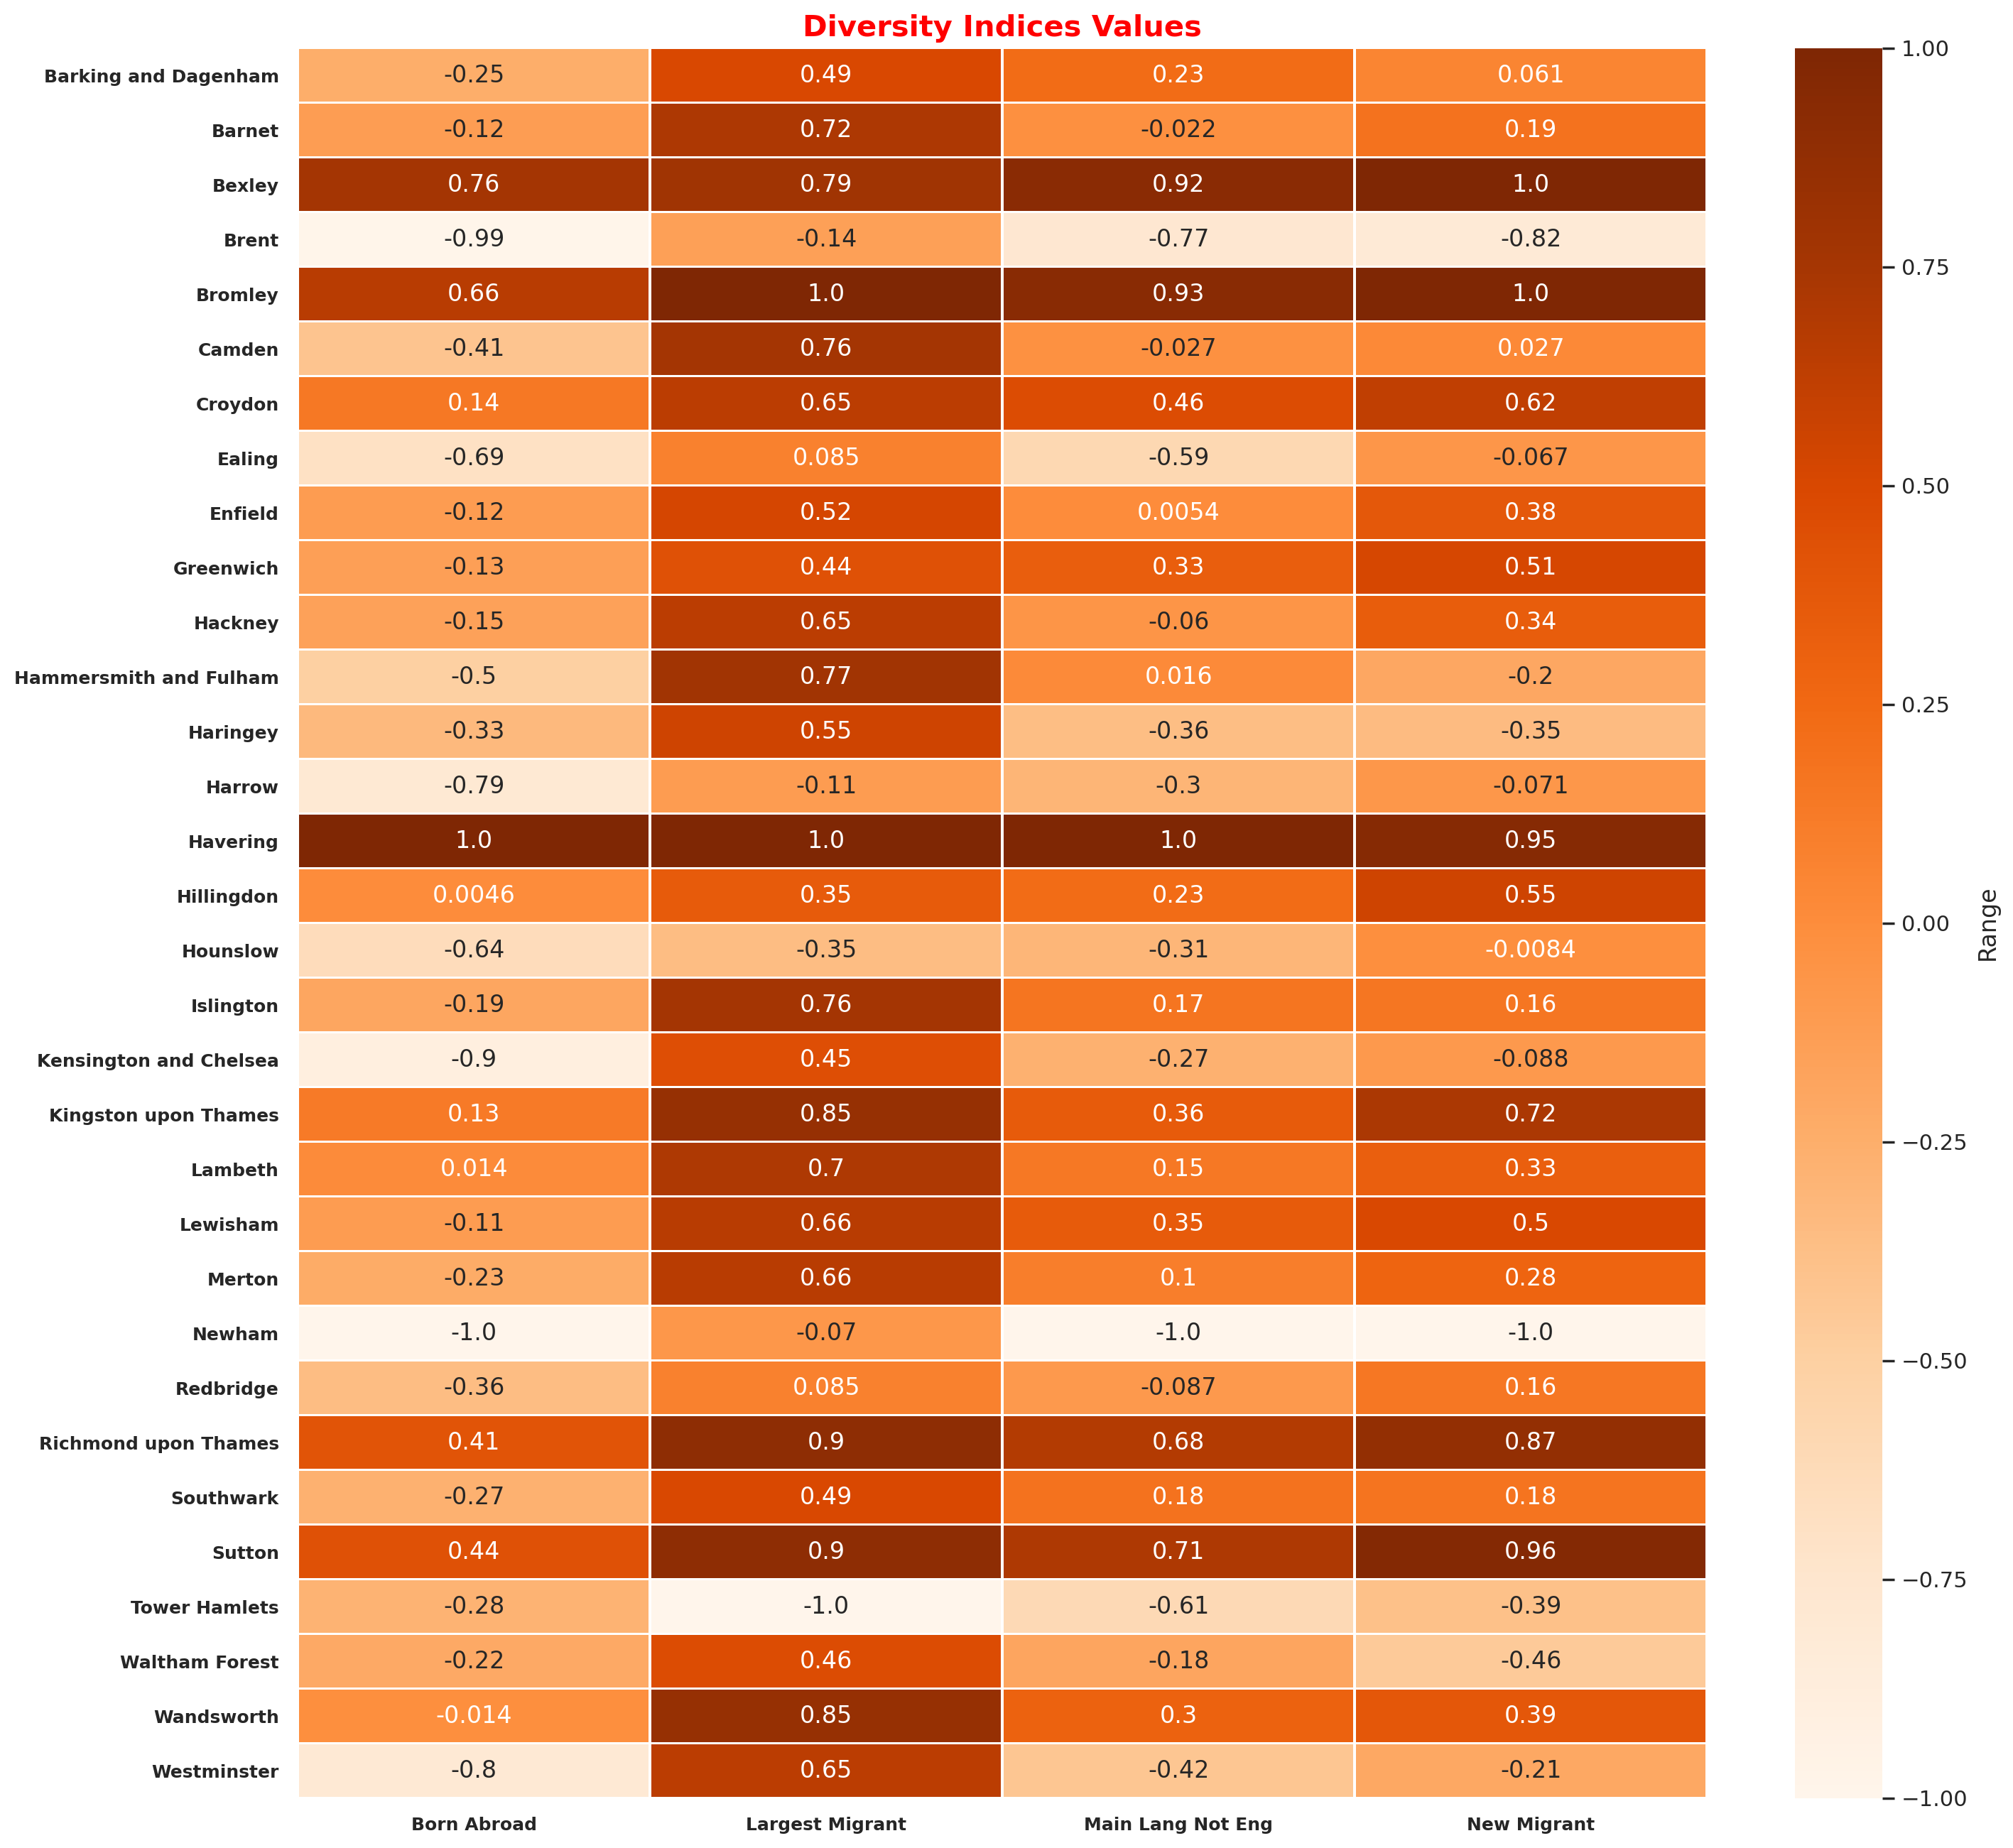

In [32]:
# Heatmap for Diversity Criteria

plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(london_DI_Ind,annot=True,fmt=".2", linewidths=1, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5],["Born Abroad","Largest Migrant","Main Lang Not Eng","New Migrant"],weight="bold",rotation=0,size=9)
plt.title("Diversity Indices Values",weight="bold",c="red", fontsize=15)
plt.show()

In [33]:
#AHP for Diversity
london_DI_Ind_Weight = [4.9,25.9,13.6,55.6]
london_DI_Ind["Total"] = ((london_DI_Ind.iloc[:,0]*london_DE_Ind_Weight[0])+
                        (london_DI_Ind.iloc[:,1]*london_DE_Ind_Weight[1])+
                        (london_DI_Ind.iloc[:,2]*london_DE_Ind_Weight[2])+
                        (london_DI_Ind.iloc[:,3]*london_DE_Ind_Weight[3]))

london_DI_Ind["Total"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london_DI_Ind.iloc[:,4].values.reshape(-1,1)))


round(london_DI_Ind,2)

DI.Ind_BornAbroad  DI.Ind_LarMigPop  \
Borough                                                       
Barking and Dagenham                -0.25              0.49   
Barnet                              -0.12              0.72   
Bexley                               0.76              0.79   
Brent                               -0.99             -0.14   
Bromley                              0.66              1.00   
Camden                              -0.41              0.76   
Croydon                              0.14              0.65   
Ealing                              -0.69              0.08   
Enfield                             -0.12              0.52   
Greenwich                           -0.13              0.44   
Hackney                             -0.15              0.65   
Hammersmith and Fulham              -0.50              0.77   
Haringey                            -0.33              0.55   
Harrow                              -0.79             -0.11   
Havering                             1.00              1.00   
Hillingdon                           0.00              0.35   
Hounslow                            -0.64             -0.35   
Islington                           -0.19              0.76   
Kensington and Chelsea              -0.90              0.45   
Kingston upon Thames                 0.13              0.85   
Lambeth                              0.01              0.70   
Lewisham                            -0.11              0.66   
Merton                              -0.23              0.66   
Newham                              -1.00             -0.07   
Redbridge                           -0.36              0.08   
Richmond upon Thames                 0.41              0.90   
Southwark                           -0.27              0.49   
Sutton                               0.44              0.90   
Tower Hamlets                       -0.28             -1.00   
Waltham Forest                      -0.22              0.46   
Wandsworth                          -0.01              0.85   
Westminster                         -0.80              0.65   

                        DI.Ind_MaiLanNotEng  DI.Ind_NewMigr  Total  
Borough                                                             
Barking and Dagenham                   0.23            0.06   0.15  
Barnet                                -0.02            0.19   0.28  
Bexley                                 0.92            1.00   0.86  
Brent                                 -0.77           -0.82  -0.76  
Bromley                                0.93            1.00   0.97  
Camden                                -0.03            0.03   0.22  
Croydon                                0.46            0.62   0.51  
Ealing                                -0.59           -0.07  -0.33  
Enfield                                0.01            0.38   0.24  
Greenwich                              0.33            0.51   0.30  
Hackney                               -0.06            0.34   0.28  
Hammersmith and Fulham                 0.02           -0.20   0.16  
Haringey                              -0.36           -0.35  -0.08  
Harrow                                -0.30           -0.07  -0.39  
Havering                               1.00            0.95   1.00  
Hillingdon                             0.23            0.55   0.26  
Hounslow                              -0.31           -0.01  -0.49  
Islington                              0.17            0.16   0.33  
Kensington and Chelsea                -0.27           -0.09  -0.09  
Kingston upon Thames                   0.36            0.72   0.63  
Lambeth                                0.15            0.33   0.36  
Lewisham                               0.35            0.50   0.43  
Merton                                 0.10            0.28   0.29  
Newham                                -1.00           -1.00  -0.83  
Redbridge                             -0.09            0.16  -0.12  
Richmond upon Tham

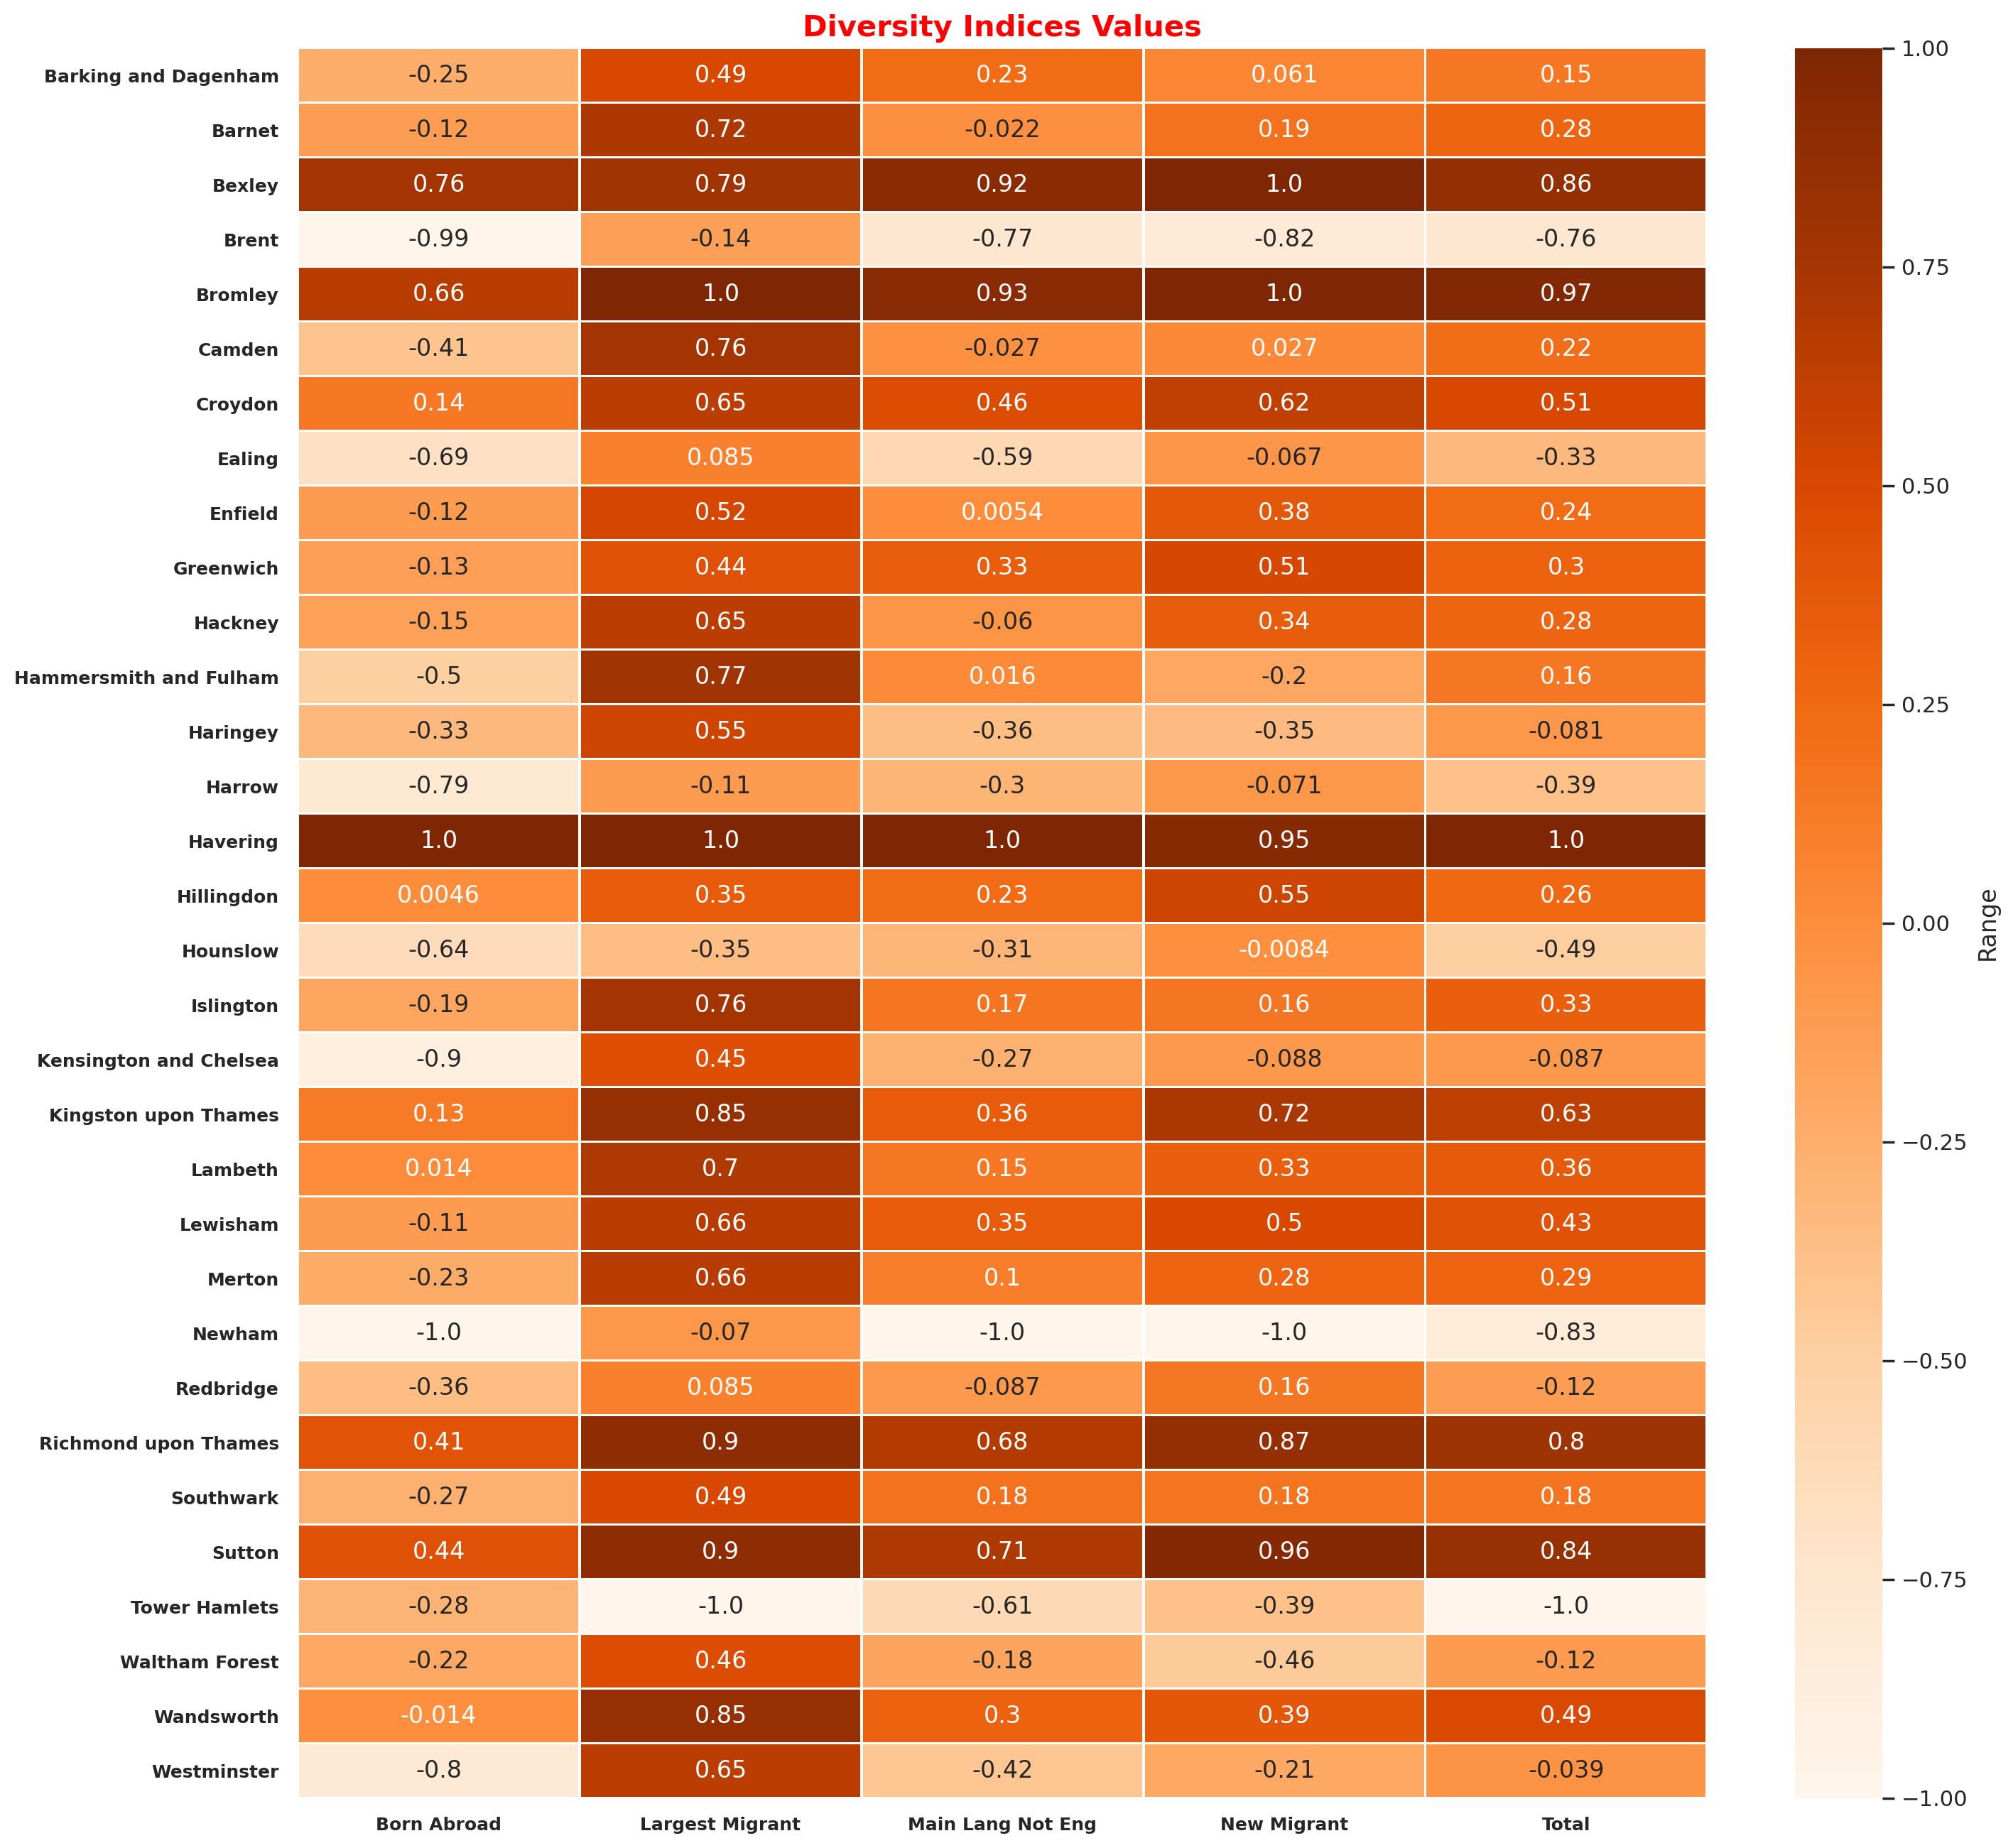

In [34]:
# Heatmap for Diversity Criteria

plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(london_DI_Ind,annot=True,fmt=".2", linewidths=1, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5,4.5],["Born Abroad","Largest Migrant","Main Lang Not Eng","New Migrant","Total"],weight="bold",rotation=0,size=9)
plt.title("Diversity Indices Values",weight="bold",c="red", fontsize=15)
plt.show()

### Criteria-3: Labour Market

In [46]:
#Resamling Labour Market Criteria
london["LM.Ind_EmpRat"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,10].values.reshape(-1,1)))
london["LM.Ind_HouMedInc"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,11].values.reshape(-1,1)))
london["LM.Ind_AdlVol"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,12].values.reshape(-1,1)))
london["LM.Ind_NumJob"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,13].values.reshape(-1,1)))
london["LM.Ind_NumBus"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,14].values.reshape(-1,1)))
                          
                              
#Filtering Diversity columns
col_list_LM = london.columns[london.columns.str.contains('LM_')]
col_list_LM_Ind = london.columns[london.columns.str.contains('LM.Ind')] 

#Creating Diversity Data Frame
london_LM = london[col_list_LM]
london_LM_Ind = london[col_list_LM_Ind]

round(london_LM_Ind,2)

LM.Ind_EmpRat  LM.Ind_HouMedInc  LM.Ind_AdlVol  \
Borough                                                                  
Barking and Dagenham            -0.97             -0.95          -0.40   
Barnet                          -0.59             -0.12           0.23   
Bexley                           0.36             -0.39          -0.32   
Brent                           -0.44             -0.75          -0.56   
Bromley                          0.39              0.06           0.02   
Camden                          -0.49              0.12          -0.33   
Croydon                          0.40             -0.39          -0.07   
Ealing                           0.01             -0.46           0.18   
Enfield                          0.06             -0.68          -0.31   
Greenwich                       -0.07             -0.51          -0.55   
Hackney                         -0.51             -0.53           0.05   
Hammersmith and Fulham           0.70              0.12           0.10   
Haringey                        -0.19             -0.51           0.06   
Harrow                           0.19             -0.25           0.51   
Havering                         0.56             -0.41          -0.58   
Hillingdon                       0.09             -0.38          -0.24   
Hounslow                         0.23             -0.51          -0.08   
Islington                        0.00             -0.18           0.13   
Kensington and Chelsea          -0.63              1.00           0.13   
Kingston upon Thames             0.26              0.13           0.70   
Lambeth                          0.84             -0.28           0.16   
Lewisham                         0.47             -0.47          -0.03   
Merton                           0.89             -0.02          -0.33   
Newham                          -0.91             -1.00          -1.00   
Redbridge                       -0.61             -0.40          -0.17   
Richmond upon Thames             1.00              0.84           1.00   
Southwark                        0.23             -0.38          -0.11   
Sutton                           0.80             -0.17          -0.25   
Tower Hamlets                   -0.31             -0.54          -0.39   
Waltham Forest                   0.07             -0.68          -0.46   
Wandsworth                       0.89              0.39           0.30   
Westminster                     -1.00              0.40          -0.23   

                        LM.Ind_NumJob  LM.Ind_NumBus  
Borough                                               
Barking and Dagenham            -1.00          -1.00  
Barnet                          -0.68          -0.20  
Bexley                          -0.94          -0.90  
Brent                           -0.78          -0.62  
Bromley                         -0.79          -0.63  
Camden                          -0.05           0.02  
Croydon                         -0.75          -0.63  
Ealing                          -0.70          -0.50  
Enfield                         -0.79          -0.70  
Greenwich                       -0.89          -0.86  
Hackney                         -0.78          -0.51  
Hammersmith and Fulham          -0.73          -0.69  
Haringey                        -0.90          -0.75  
Harrow                          -0.91          -0.65  
Havering                        -0.90          -0.85  
Hillingdon                      -0.52          -0.72  
Hounslow                        -0.68          -0.70  
Islington                       -0.49          -0.36  
Kensington and Chelsea          -0.75          -0.68  
Kingston upon Thames            -0.93          -0.90  
Lambeth                         -0.63          -0.56  
Lewisham                        -0.91          -0.84  
Merton                          -0.89          -0.77  
Newham                          -0.84          -0.82  
Redbridge                       -0.91          -0.67  
Richmond upon Thames  

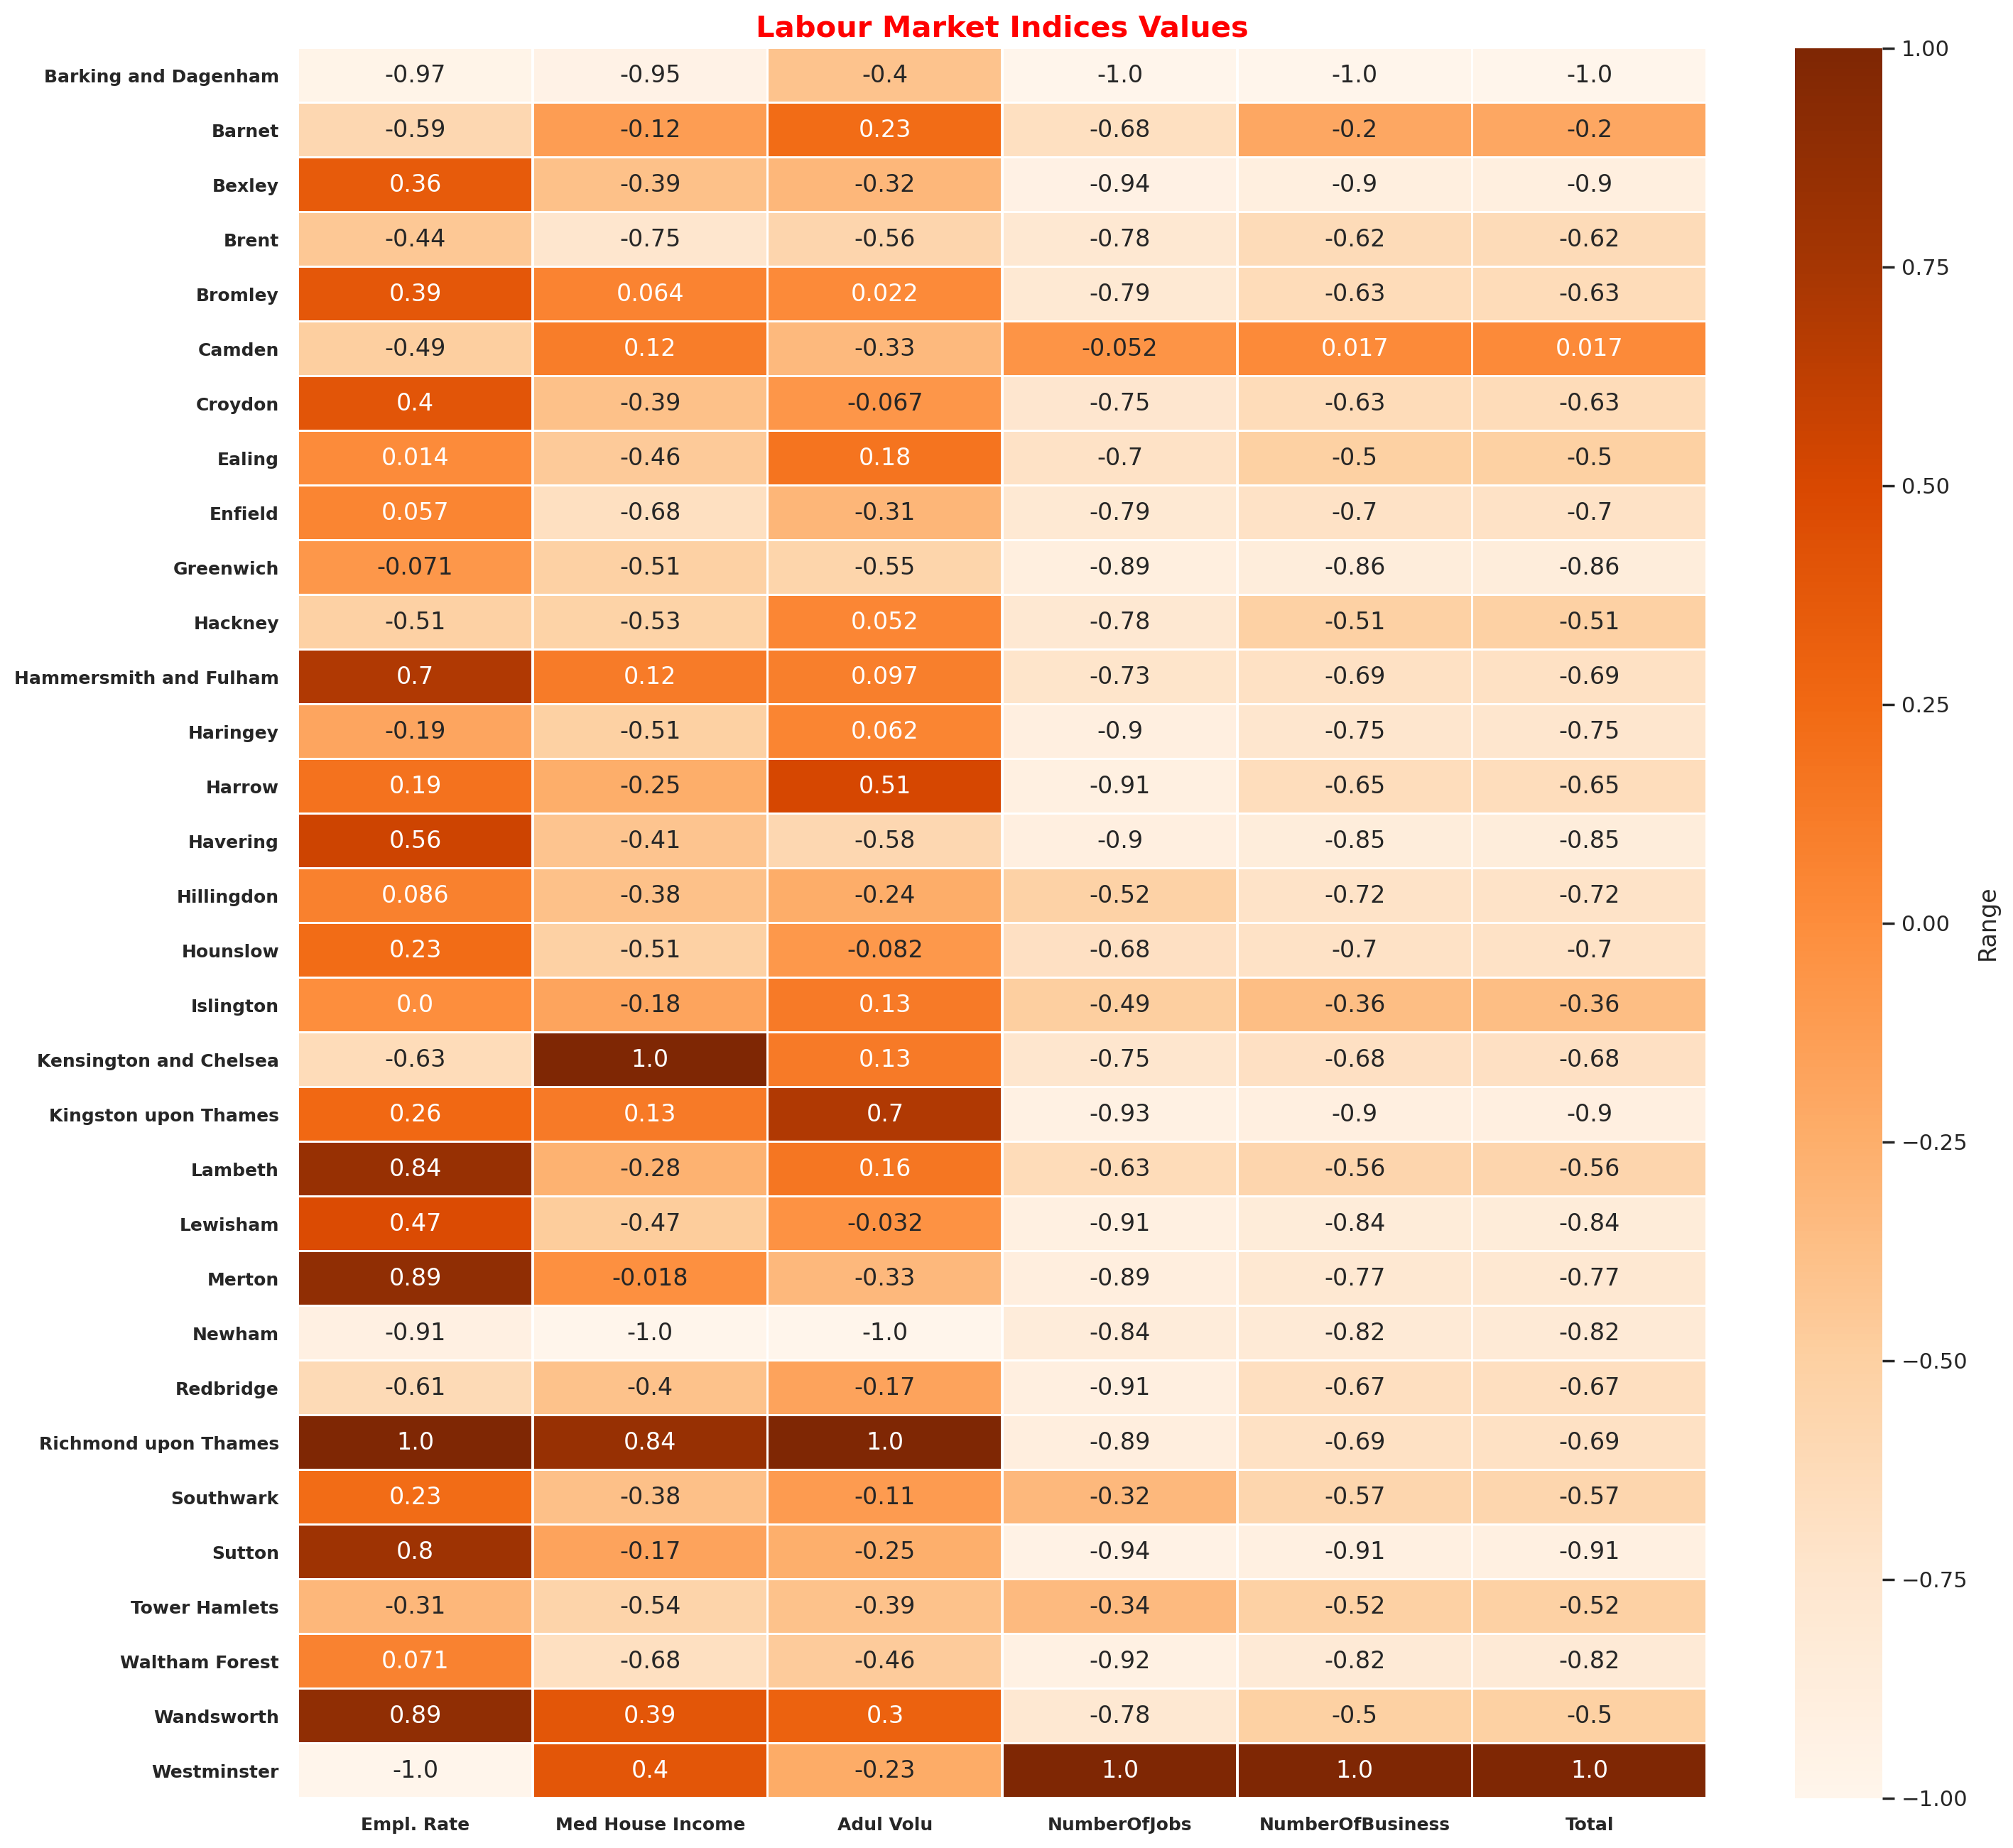

In [56]:
# Heatmap for Labour Market 

plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(london_LM_Ind,annot=True,fmt=".2", linewidths=1, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5],["Empl. Rate","Med House Income","Adul Volu","NumberOfJobs","NumberOfBusiness","Total"],weight="bold",rotation=0,size=9)
plt.title("Labour Market Indices Values",weight="bold",c="red", fontsize=15)
plt.show()

In [48]:
#AHP for Labour Market
london_LM_Ind_Weight = [18.9,27.3,3.8,36,13.9]
london_LM_Ind["Total"] = ((london_LM_Ind.iloc[:,0]*london_LM_Ind_Weight[0])+
                        (london_LM_Ind.iloc[:,1]*london_LM_Ind_Weight[1])+
                        (london_LM_Ind.iloc[:,2]*london_LM_Ind_Weight[2])+
                        (london_LM_Ind.iloc[:,3]*london_LM_Ind_Weight[3])+
                        (london_LM_Ind.iloc[:,3]*london_LM_Ind_Weight[3]))

london_LM_Ind["Total"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london_LM_Ind.iloc[:,4].values.reshape(-1,1)))


round(london_LM_Ind,2)

LM.Ind_EmpRat  LM.Ind_HouMedInc  LM.Ind_AdlVol  \
Borough                                                                  
Barking and Dagenham            -0.97             -0.95          -0.40   
Barnet                          -0.59             -0.12           0.23   
Bexley                           0.36             -0.39          -0.32   
Brent                           -0.44             -0.75          -0.56   
Bromley                          0.39              0.06           0.02   
Camden                          -0.49              0.12          -0.33   
Croydon                          0.40             -0.39          -0.07   
Ealing                           0.01             -0.46           0.18   
Enfield                          0.06             -0.68          -0.31   
Greenwich                       -0.07             -0.51          -0.55   
Hackney                         -0.51             -0.53           0.05   
Hammersmith and Fulham           0.70              0.12           0.10   
Haringey                        -0.19             -0.51           0.06   
Harrow                           0.19             -0.25           0.51   
Havering                         0.56             -0.41          -0.58   
Hillingdon                       0.09             -0.38          -0.24   
Hounslow                         0.23             -0.51          -0.08   
Islington                        0.00             -0.18           0.13   
Kensington and Chelsea          -0.63              1.00           0.13   
Kingston upon Thames             0.26              0.13           0.70   
Lambeth                          0.84             -0.28           0.16   
Lewisham                         0.47             -0.47          -0.03   
Merton                           0.89             -0.02          -0.33   
Newham                          -0.91             -1.00          -1.00   
Redbridge                       -0.61             -0.40          -0.17   
Richmond upon Thames             1.00              0.84           1.00   
Southwark                        0.23             -0.38          -0.11   
Sutton                           0.80             -0.17          -0.25   
Tower Hamlets                   -0.31             -0.54          -0.39   
Waltham Forest                   0.07             -0.68          -0.46   
Wandsworth                       0.89              0.39           0.30   
Westminster                     -1.00              0.40          -0.23   

                        LM.Ind_NumJob  LM.Ind_NumBus  Total  
Borough                                                      
Barking and Dagenham            -1.00          -1.00  -1.00  
Barnet                          -0.68          -0.20  -0.20  
Bexley                          -0.94          -0.90  -0.90  
Brent                           -0.78          -0.62  -0.62  
Bromley                         -0.79          -0.63  -0.63  
Camden                          -0.05           0.02   0.02  
Croydon                         -0.75          -0.63  -0.63  
Ealing                          -0.70          -0.50  -0.50  
Enfield                         -0.79          -0.70  -0.70  
Greenwich                       -0.89          -0.86  -0.86  
Hackney                         -0.78          -0.51  -0.51  
Hammersmith and Fulham          -0.73          -0.69  -0.69  
Haringey                        -0.90          -0.75  -0.75  
Harrow                          -0.91          -0.65  -0.65  
Havering                        -0.90          -0.85  -0.85  
Hillingdon                      -0.52          -0.72  -0.72  
Hounslow                        -0.68          -0.70  -0.70  
Islington                       -0.49          -0.36  -0.36  
Kensington and Chelsea          -0.75          -0.68  -0.68  
Kingston upon Thames            -0.93          -0.90  -0.90  
Lambeth                         -0.63          -0.56  -0.56  
Lewisham                        -0.91          -0.84  -0.84  
Merton             

### Criteria-4: Safety

In [60]:
london.iloc[:,17]

Borough
Barking and Dagenham      13.7
Barnet                    11.1
Bexley                    11.8
Brent                     12.1
Bromley                   11.2
Camden                    14.8
Croydon                   12.8
Ealing                    11.3
Enfield                   12.2
Greenwich                 11.9
Hackney                   11.5
Hammersmith and Fulham    12.2
Haringey                  12.3
Harrow                     9.8
Havering                  12.9
Hillingdon                14.7
Hounslow                  12.1
Islington                 13.9
Kensington and Chelsea    12.7
Kingston upon Thames      11.1
Lambeth                   13.3
Lewisham                  12.0
Merton                    10.4
Newham                    12.2
Redbridge                 11.3
Richmond upon Thames       9.7
Southwark                 13.6
Sutton                    11.3
Tower Hamlets             11.8
Waltham Forest            11.7
Wandsworth                10.1
Westminster               19.9


                        SA.Ind_CriRat  SA.Ind_Fires  SA.Ind_AmbInc  Total
Borough                                                                  
Barking and Dagenham             0.59         -0.26           0.22   0.46
Barnet                           0.85          0.78           0.73   0.82
Bexley                           0.98          0.26           0.59   0.85
Brent                            0.65          0.63           0.53   0.63
Bromley                          0.83          0.26           0.71   0.76
Camden                           0.10         -0.04          -0.00   0.07
Croydon                          0.67          0.33           0.39   0.59
Ealing                           0.69          0.56           0.69   0.68
Enfield                          0.77          0.33           0.51   0.69
Greenwich                        0.64          0.11           0.57   0.59
Hackney                          0.39         -0.04           0.65   0.41
Hammersmith and Fulham           0.22 

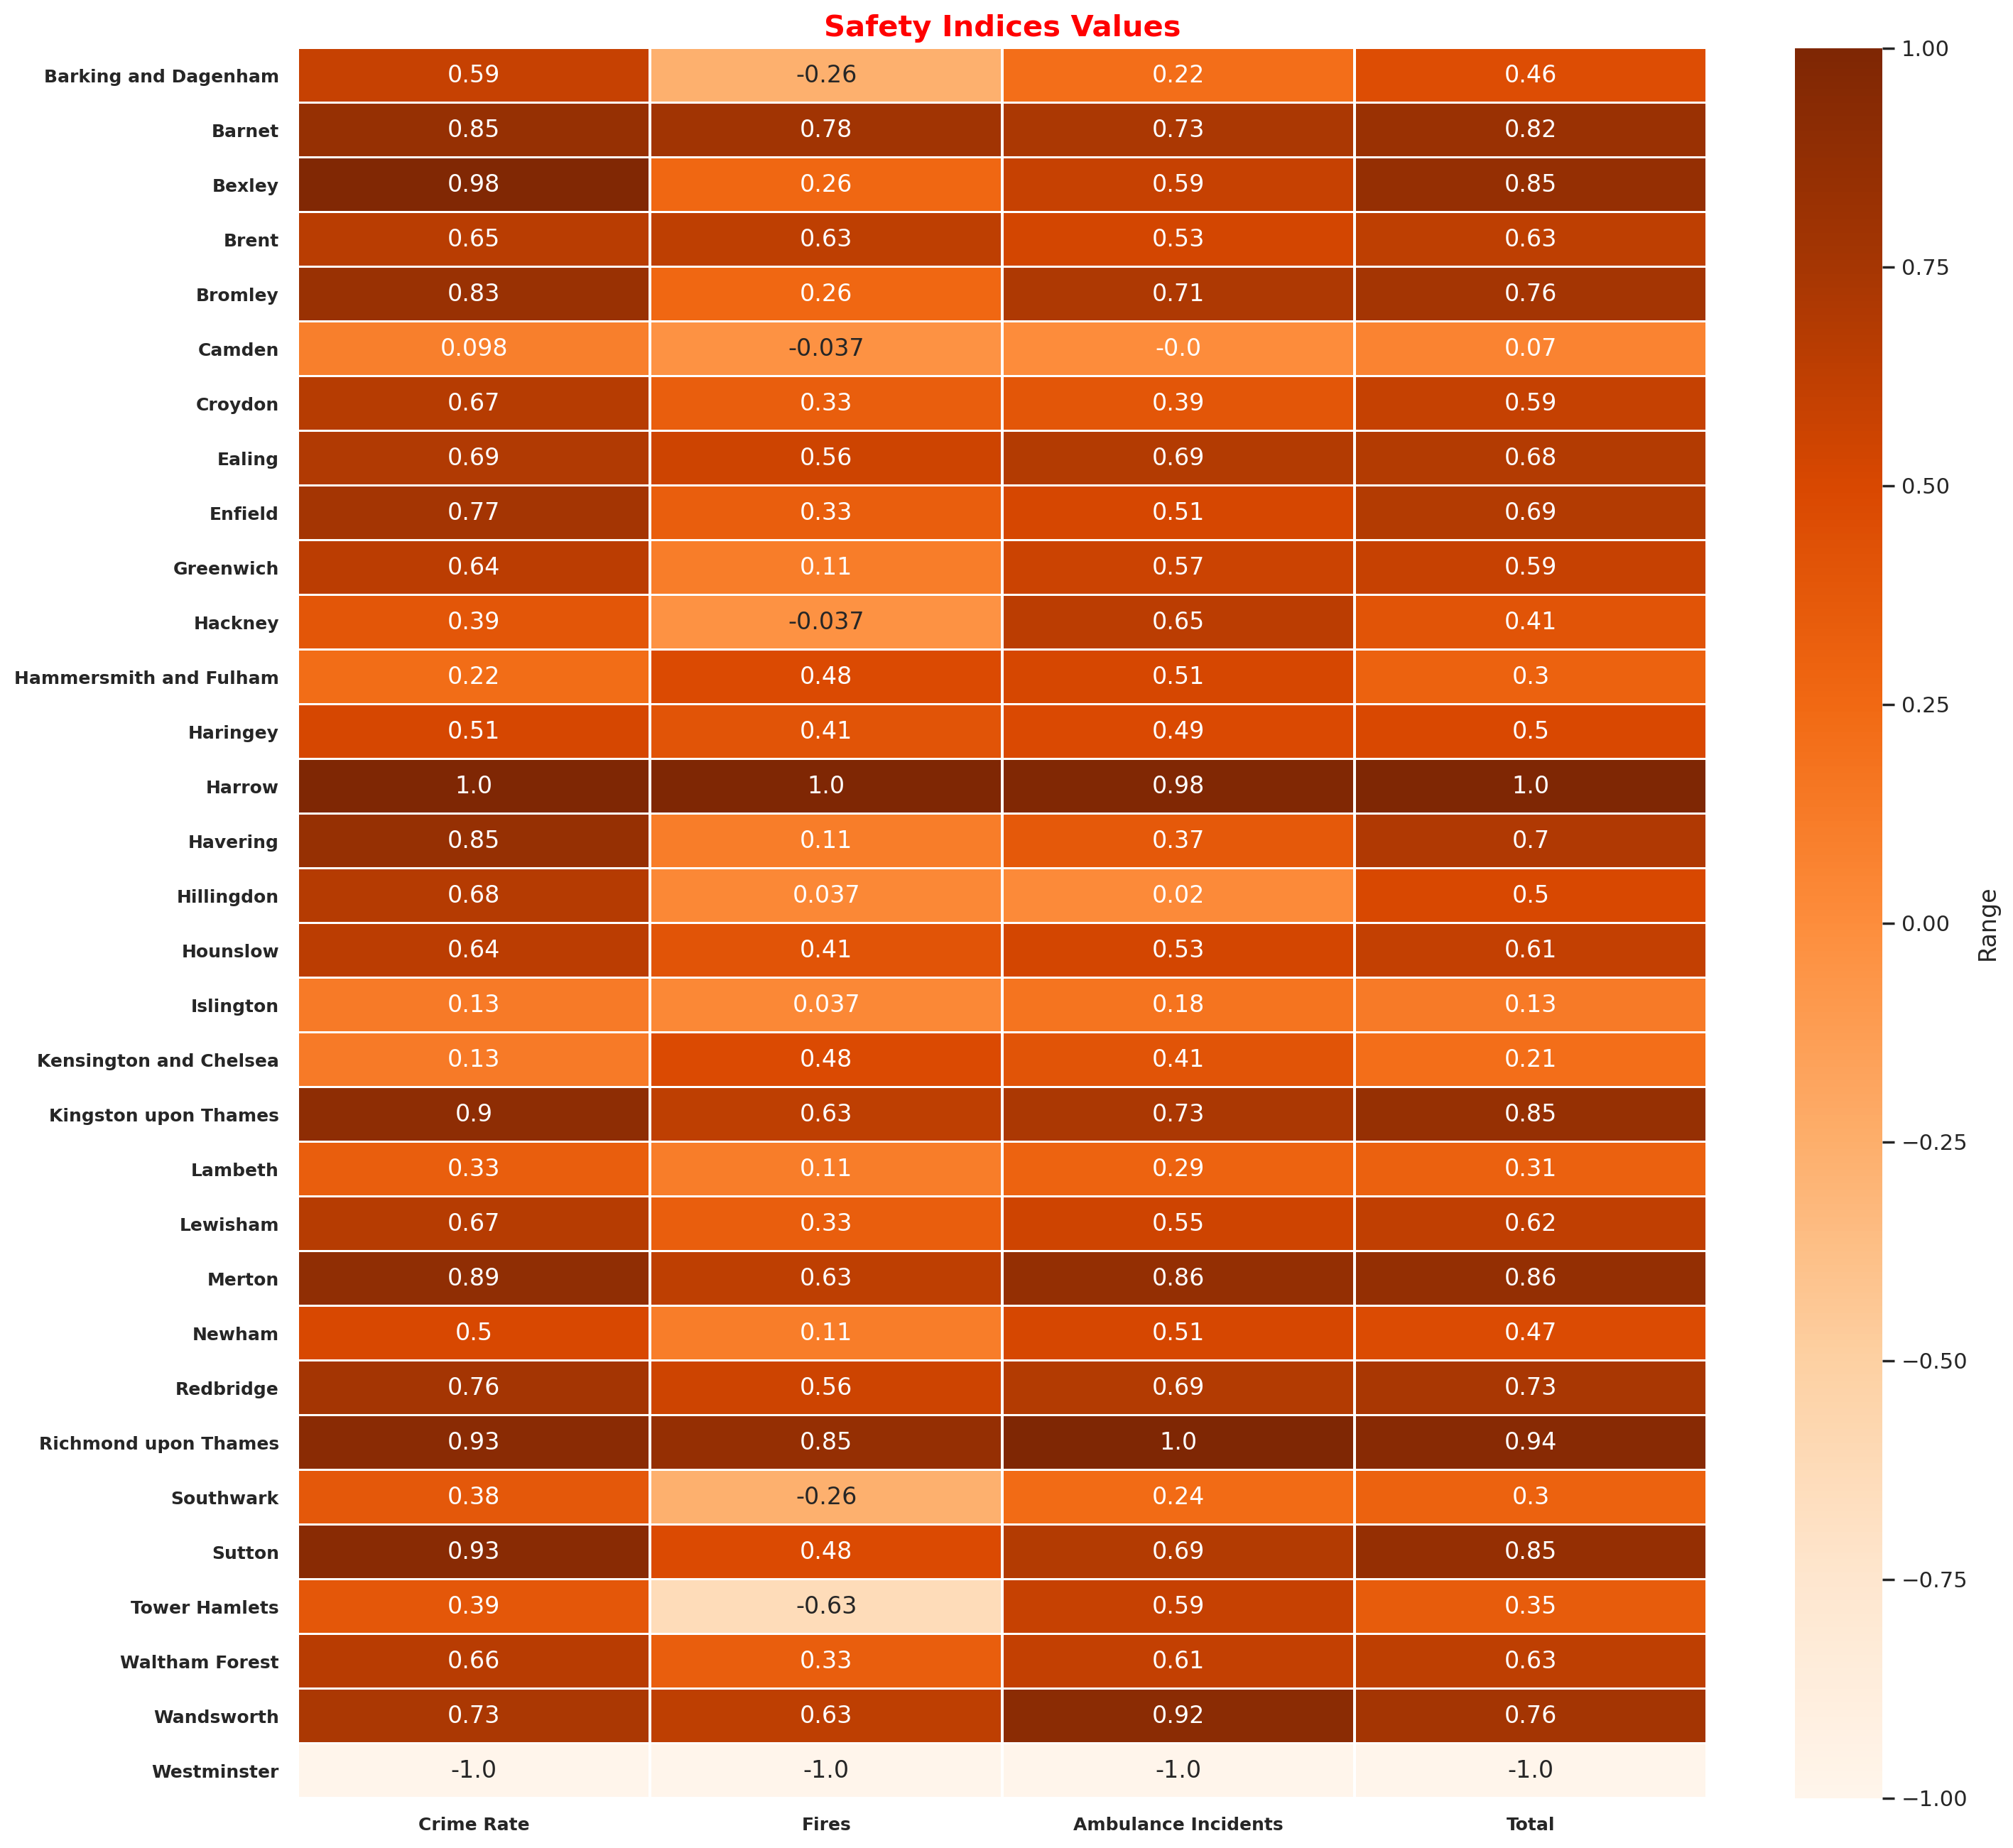

In [63]:
#Resampling Safety Criteria
london["SA.Ind_CriRat"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,15].values.reshape(-1,1))*-1)
london["SA.Ind_Fires"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,16].values.reshape(-1,1))*-1)
london["SA.Ind_AmbInc"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,17].values.reshape(-1,1))*-1)

#Filtering Safety columns
col_list_SA = london.columns[london.columns.str.contains('SA_')]
col_list_SA_Ind = london.columns[london.columns.str.contains('SA.Ind')] 

#Creating Safety Data Frame
london_SA = london[col_list_SA]
london_SA_Ind = london[col_list_SA_Ind]

#AHP for Safety 
london_SA_Ind_Weight = [73.1,8.1,18.8]
london_SA_Ind["Total"] = ((london_SA_Ind.iloc[:,0]*london_SA_Ind_Weight[0])+
                        (london_SA_Ind.iloc[:,1]*london_SA_Ind_Weight[1])+
                        (london_SA_Ind.iloc[:,2]*london_SA_Ind_Weight[2]))

london_SA_Ind["Total"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london_SA_Ind.iloc[:,3].values.reshape(-1,1)))


print(round(london_SA_Ind,2))

# Heatmap for Safety 

plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(london_SA_Ind,annot=True,fmt=".2", linewidths=1, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5],["Crime Rate","Fires","Ambulance Incidents","Total"],weight="bold",rotation=0,size=9)
plt.title("Safety Indices Values",weight="bold",c="red", fontsize=15)
plt.show()

### Criteria-5: Housing

                        HA.Ind_HouPri  HA.Ind_CouTax  HA.Ind_NewHom  Total
Borough                                                                   
Barking and Dagenham             1.00          -0.35          -0.40   0.92
Barnet                           0.58          -0.44           0.11   0.63
Bexley                           0.93          -0.58          -1.00   0.68
Brent                            0.66          -0.40          -0.18   0.64
Bromley                          0.73          -0.34          -0.42   0.65
Camden                           0.05          -0.36          -0.23   0.04
Croydon                          0.88          -0.63           0.51   1.00
Ealing                           0.61          -0.32          -0.41   0.55
Enfield                          0.84          -0.48          -0.44   0.74
Greenwich                        0.80          -0.24           0.29   0.91
Hackney                          0.50          -0.23          -0.33   0.46
Hammersmith and Fulham   

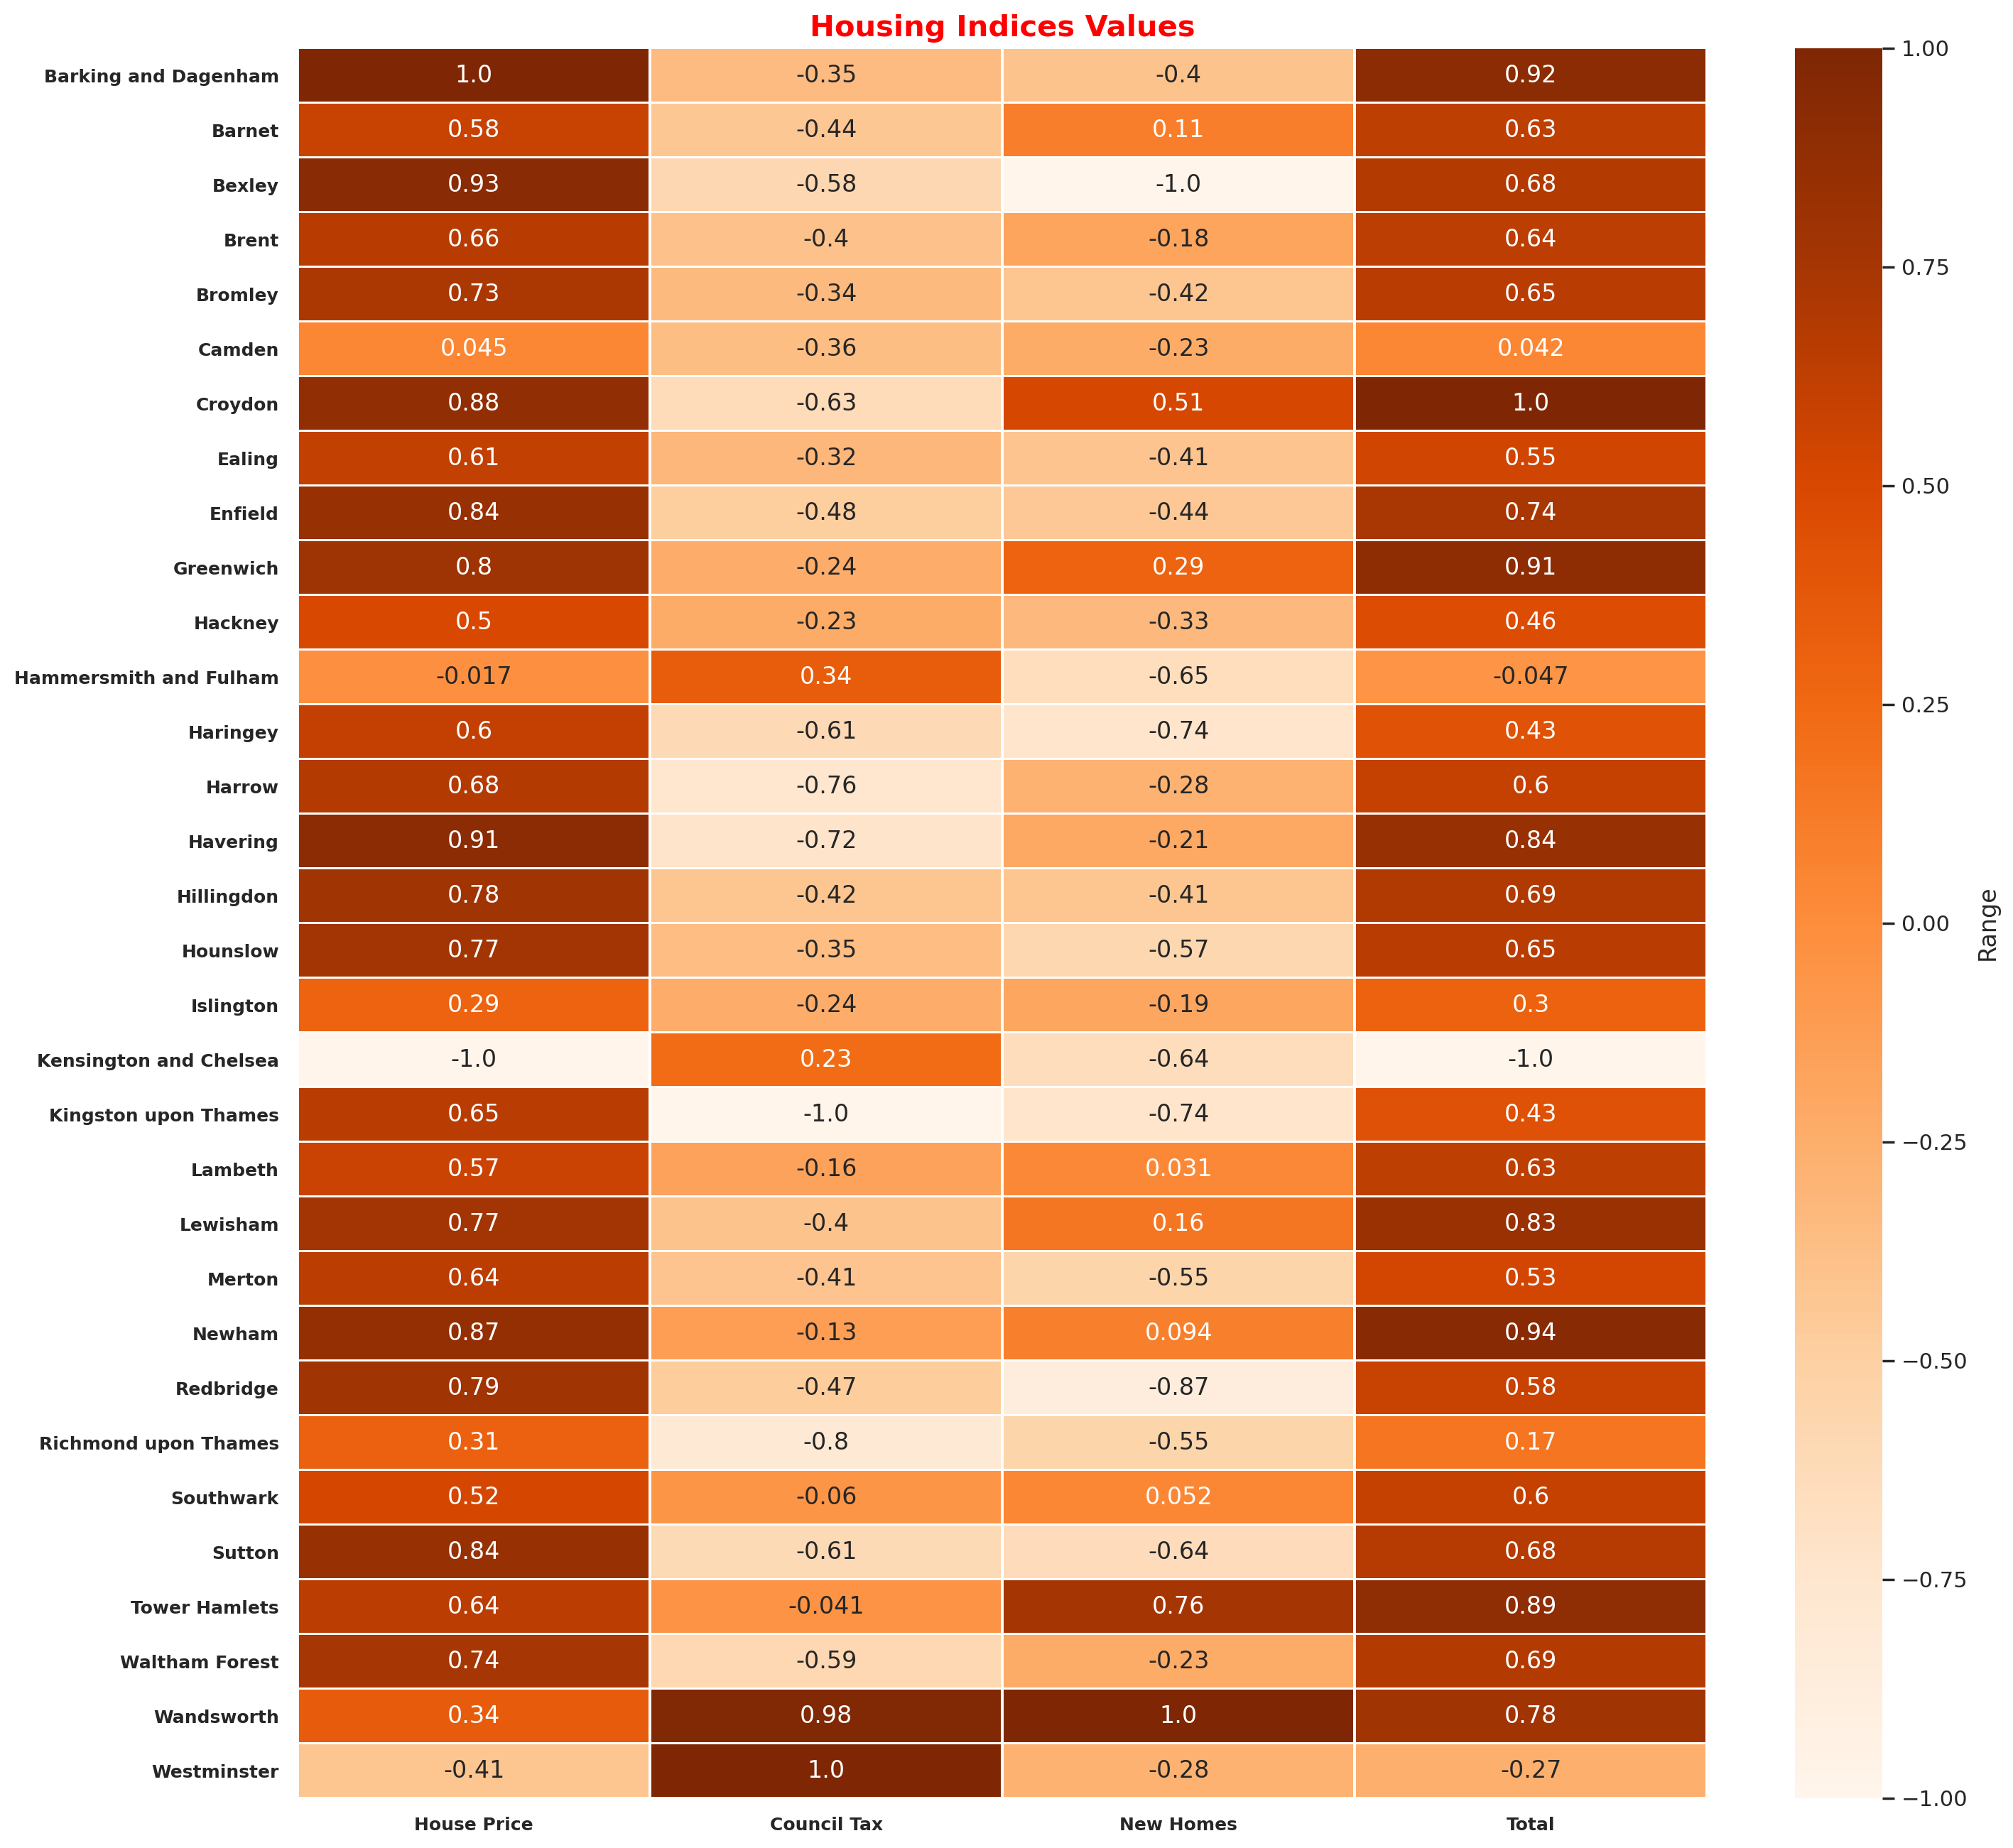

In [71]:
#Resampling Housing Criteria
london["HA.Ind_HouPri"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,18].values.reshape(-1,1))*-1)
london["HA.Ind_CouTax"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,19].values.reshape(-1,1))*-1)
london["HA.Ind_NewHom"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,20].values.reshape(-1,1)))

#Filtering Housing columns
col_list_HA = london.columns[london.columns.str.contains('HA_')]
col_list_HA_Ind = london.columns[london.columns.str.contains('HA.Ind')] 

#Creating Housing Data Frame
london_HA = london[col_list_HA]
london_HA_Ind = london[col_list_HA_Ind]

#AHP for Housing 
london_HA_Ind_Weight = [74,9.4,16.7]
london_HA_Ind["Total"] = ((london_HA_Ind.iloc[:,0]*london_SA_Ind_Weight[0])+
                        (london_HA_Ind.iloc[:,1]*london_SA_Ind_Weight[1])+
                        (london_HA_Ind.iloc[:,2]*london_SA_Ind_Weight[2]))

london_HA_Ind["Total"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london_HA_Ind.iloc[:,3].values.reshape(-1,1)))


print(round(london_HA_Ind,2))

# Heatmap for Housing

plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(london_HA_Ind,annot=True,fmt=".2", linewidths=1, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5],["House Price","Council Tax","New Homes","Total"],weight="bold",rotation=0,size=9)
plt.title("Housing Indices Values",weight="bold",c="red", fontsize=15)
plt.show()

### Criteria-6: Environment

In [75]:
london.iloc[:,23]

Borough
Barking and Dagenham      23.4
Barnet                    38.0
Bexley                    54.0
Brent                     35.2
Bromley                   48.0
Camden                    26.3
Croydon                   39.9
Ealing                    40.1
Enfield                   38.5
Greenwich                 34.3
Hackney                   25.3
Hammersmith and Fulham    20.7
Haringey                  37.3
Harrow                    45.1
Havering                  32.4
Hillingdon                43.8
Hounslow                  34.5
Islington                 32.8
Kensington and Chelsea    25.3
Kingston upon Thames      45.7
Lambeth                   28.3
Lewisham                  17.1
Merton                    37.5
Newham                    17.2
Redbridge                 28.7
Richmond upon Thames      41.2
Southwark                 34.6
Sutton                    37.6
Tower Hamlets             28.1
Waltham Forest            35.5
Wandsworth                20.7
Westminster               19.1


                        EN.Ind_AreGre  EN.Ind_CarEmi  EN.Ind_WasRec  Total
Borough                                                                   
Barking and Dagenham            -0.10           1.00          -0.66   0.08
Barnet                           0.23           0.17           0.13   0.19
Bexley                          -0.18           0.64           1.00   0.13
Brent                           -0.59           0.43          -0.02  -0.48
Bromley                          0.94           0.42           0.67   1.00
Camden                          -0.47           0.31          -0.50  -0.48
Croydon                          0.05           0.36           0.24   0.12
Ealing                          -0.21           0.25           0.25  -0.16
Enfield                          0.42           0.35           0.16   0.43
Greenwich                       -0.06           0.60          -0.07   0.06
Hackney                         -0.54           0.82          -0.56  -0.37
Hammersmith and Fulham   

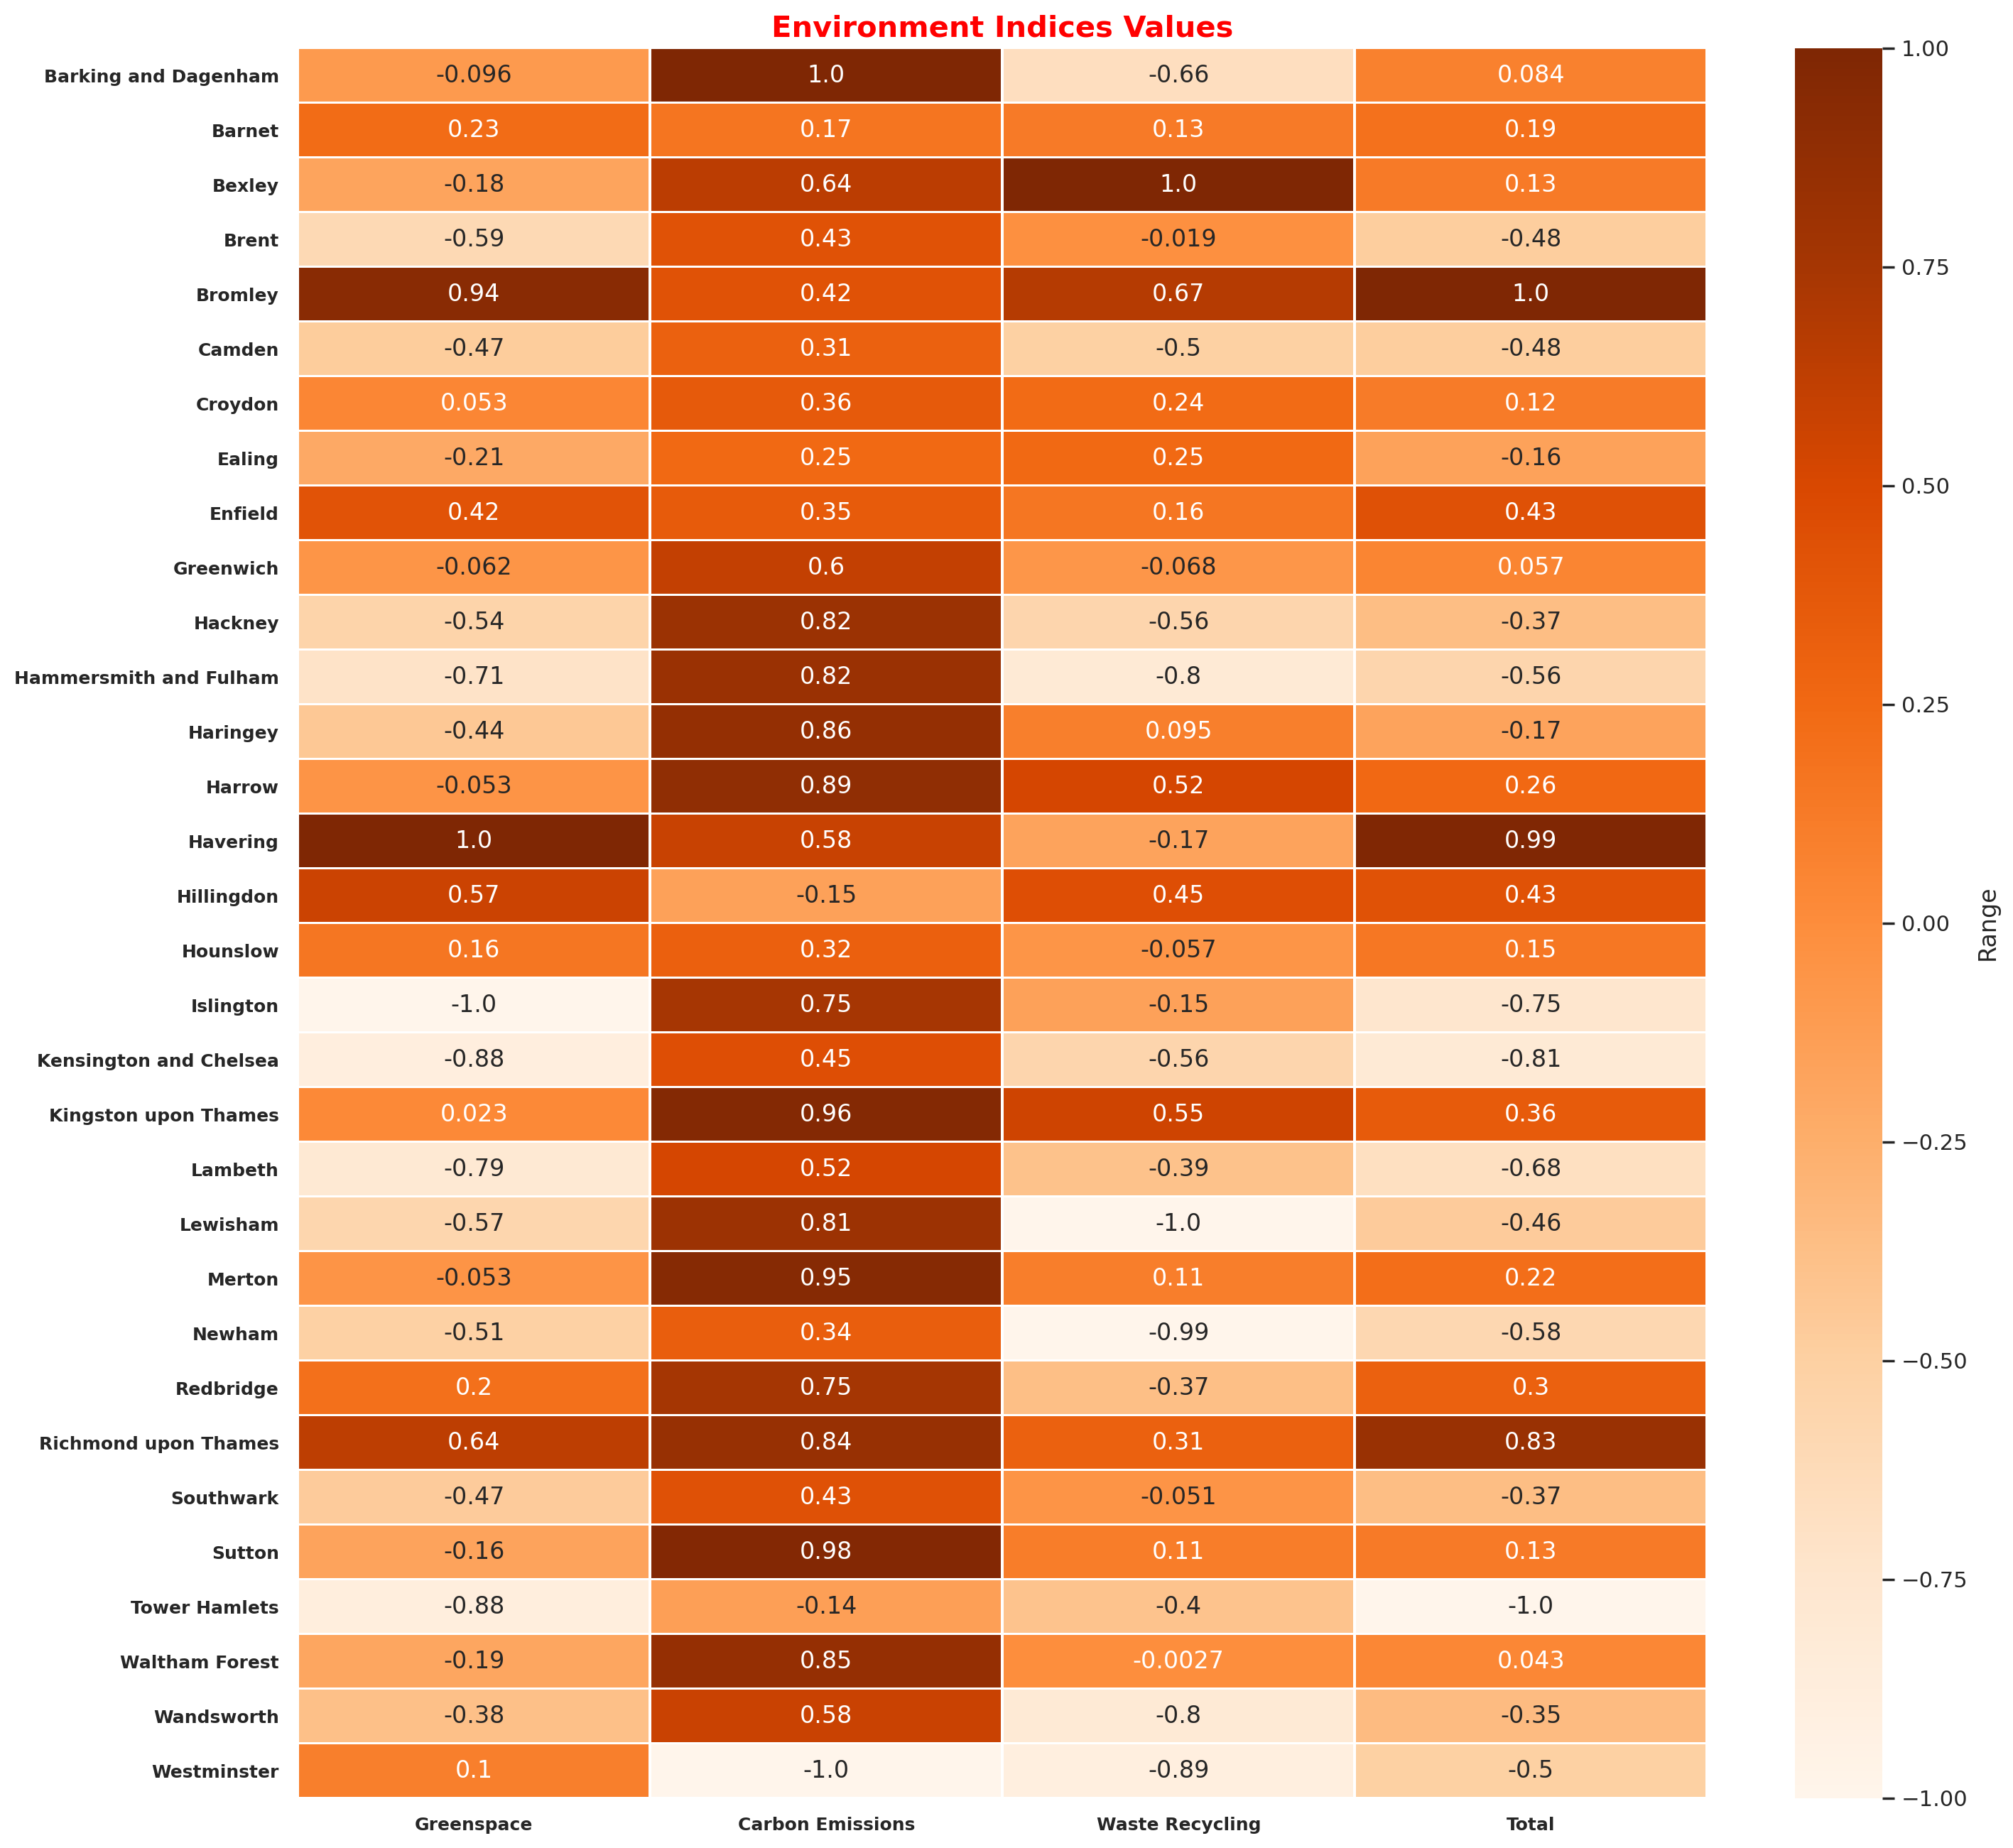

In [78]:
#Resampling Housing Criteria
london["EN.Ind_AreGre"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,21].values.reshape(-1,1)))
london["EN.Ind_CarEmi"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,22].values.reshape(-1,1))*-1)
london["EN.Ind_WasRec"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,23].values.reshape(-1,1)))

#Filtering Housing columns
col_list_EN = london.columns[london.columns.str.contains('EN_')]
col_list_EN_Ind = london.columns[london.columns.str.contains('EN.Ind')] 

#Creating Housing Data Frame
london_EN = london[col_list_EN]
london_EN_Ind = london[col_list_EN_Ind]

#AHP for Housing 
london_EN_Ind_Weight = [63.7,25.8,10.5]
london_EN_Ind["Total"] = ((london_EN_Ind.iloc[:,0]*london_EN_Ind_Weight[0])+
                         (london_EN_Ind.iloc[:,1]*london_EN_Ind_Weight[1])+
                         (london_EN_Ind.iloc[:,2]*london_EN_Ind_Weight[2]))

london_EN_Ind["Total"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london_EN_Ind.iloc[:,3].values.reshape(-1,1)))


print(round(london_EN_Ind,2))

# Heatmap for Housing

plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(london_EN_Ind,annot=True,fmt=".2", linewidths=1, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5],["Greenspace","Carbon Emissions","Waste Recycling","Total"],weight="bold",rotation=0,size=9)
plt.title("Environment Indices Values",weight="bold",c="red", fontsize=15)
plt.show()

### Criteria-7: Transport

                        TR.Ind_NumCar  TR.Ind_AduCycle  TR.Ind_TraAcc  Total
Borough                                                                     
Barking and Dagenham             0.68            -0.77          -0.71  -0.61
Barnet                          -0.84            -0.87          -0.71  -0.87
Bexley                          -0.21            -0.64          -0.90  -0.89
Brent                            0.15            -0.83          -0.37  -0.41
Bromley                         -1.00            -0.46          -0.80  -0.89
Camden                           0.86            -0.04           0.61   0.72
Croydon                         -0.76            -0.48          -0.61  -0.68
Ealing                          -0.29            -0.32          -0.56  -0.53
Enfield                         -0.41            -0.83          -0.71  -0.79
Greenwich                        0.31            -0.85          -0.51  -0.52
Hackney                          0.94             0.43           0.22   0.51

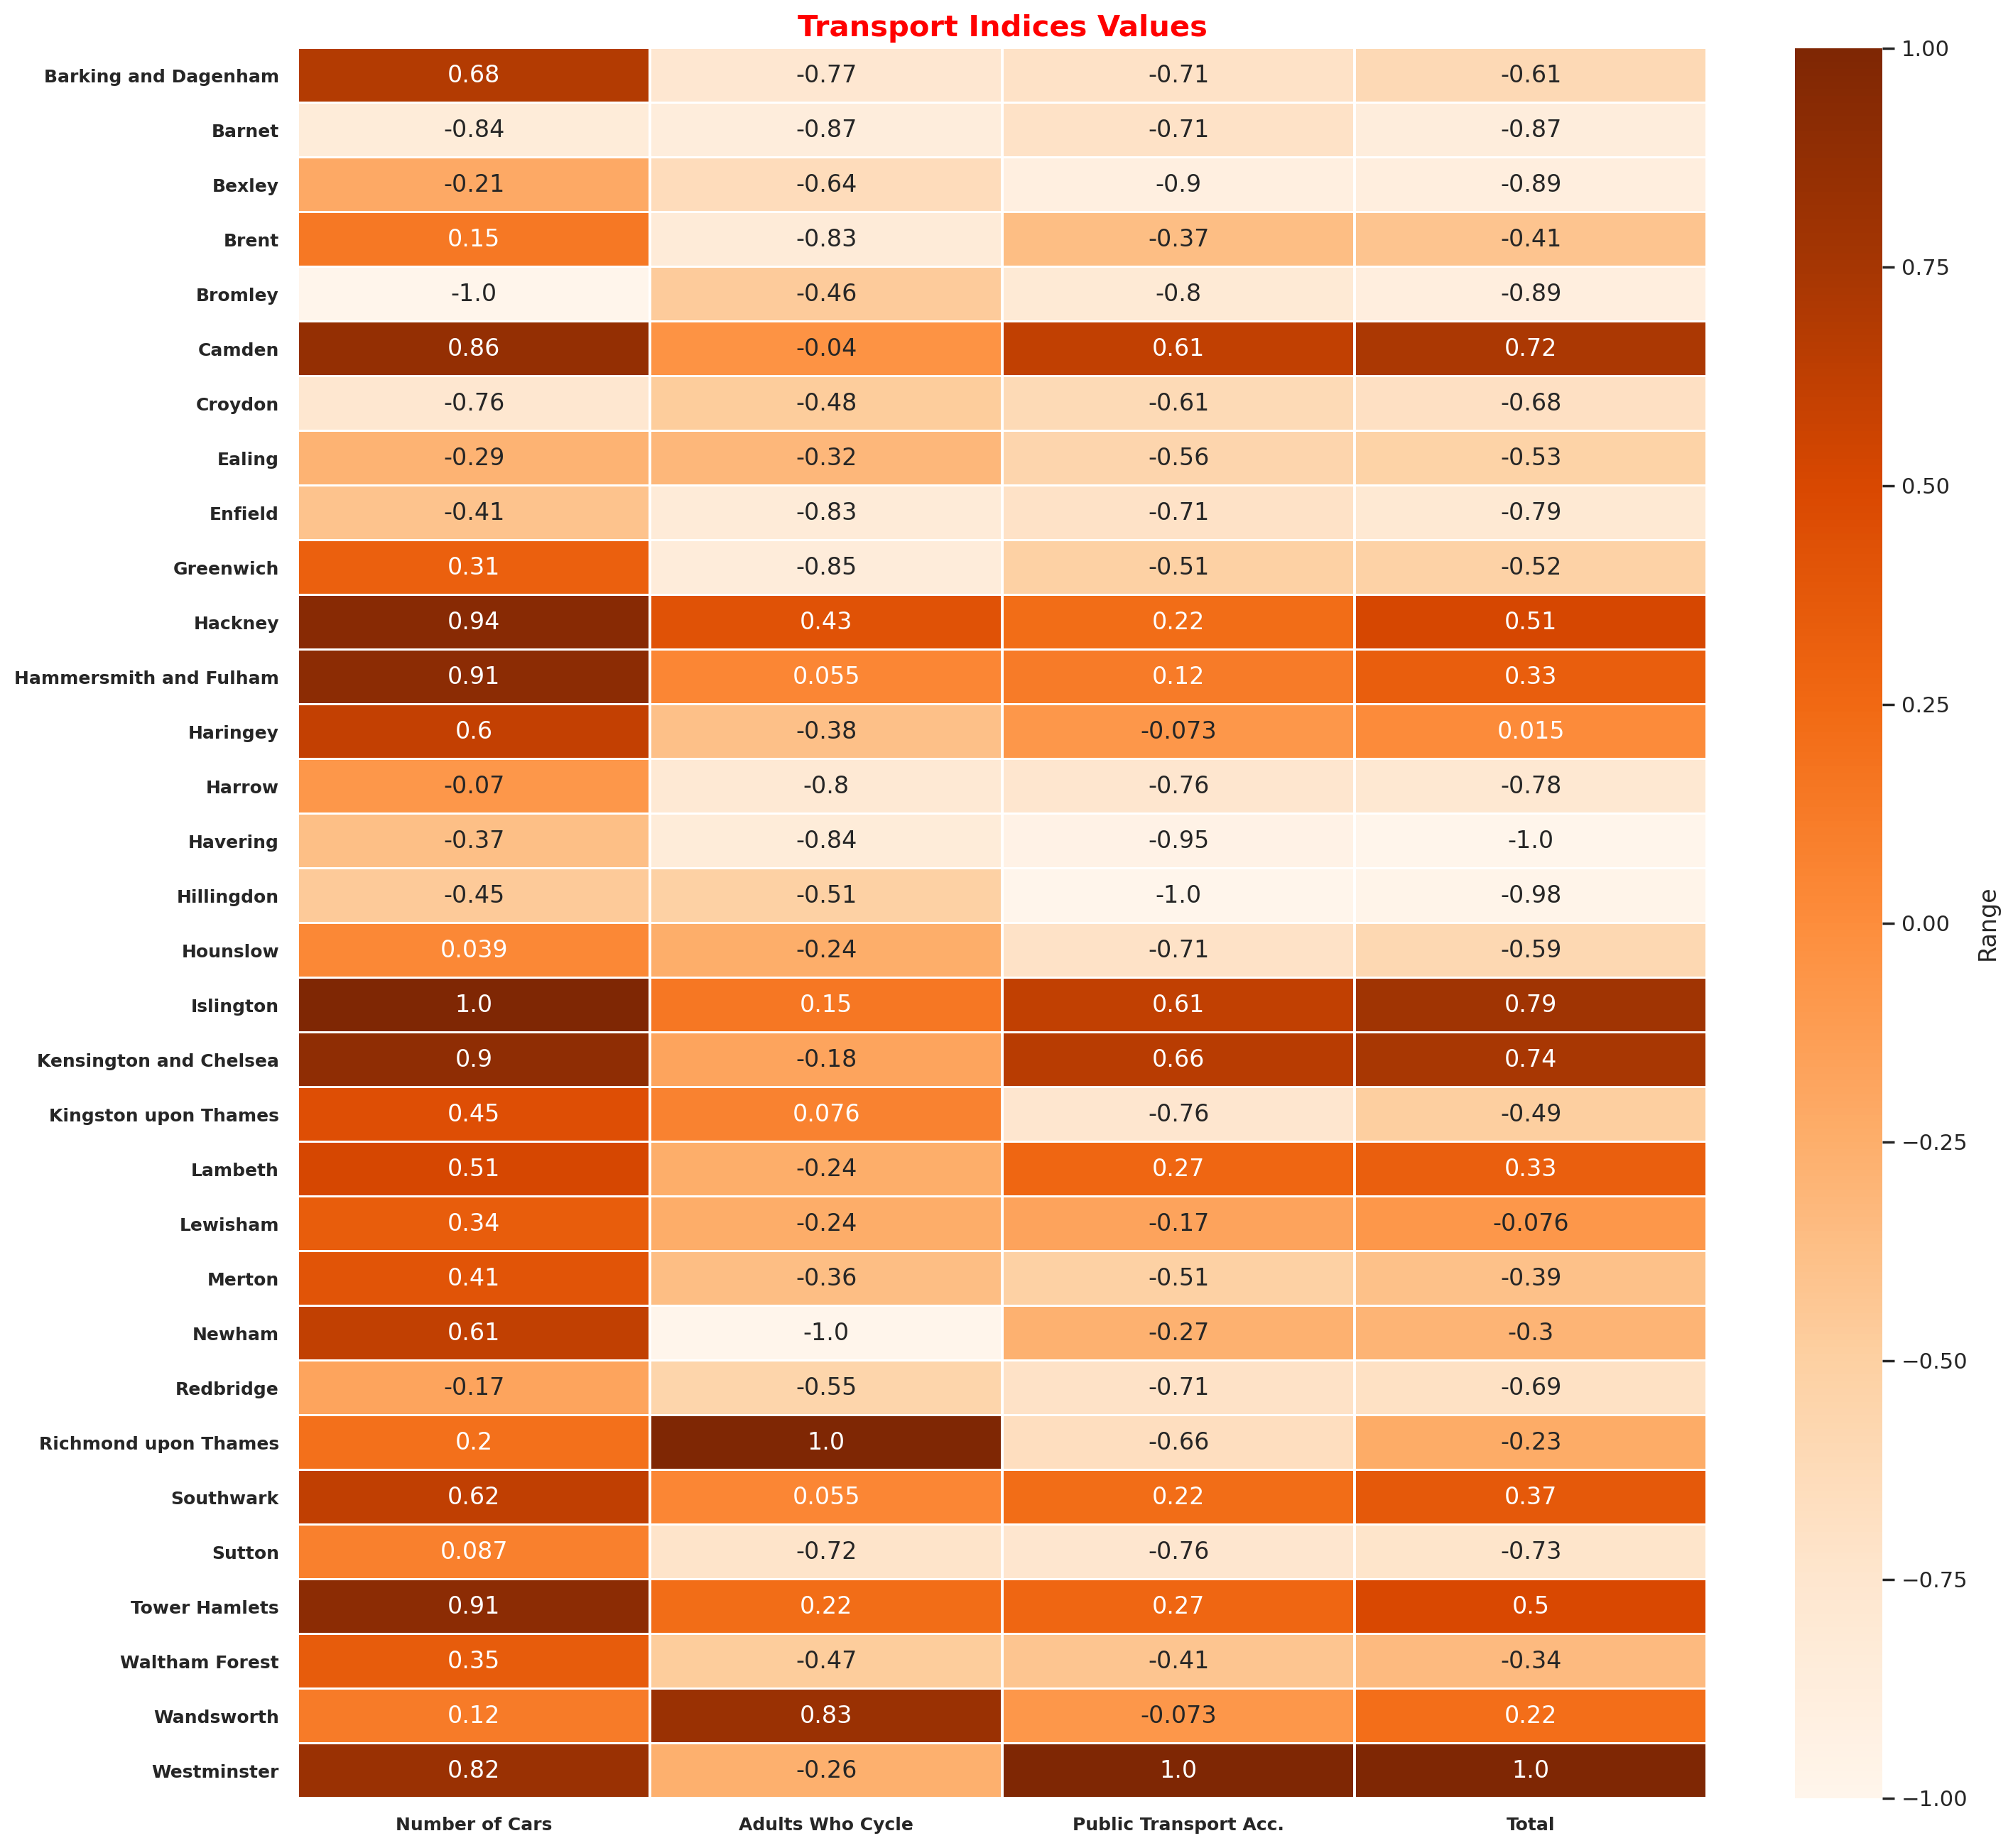

In [87]:
#Resampling Housing Criteria
london["TR.Ind_NumCar"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,24].values.reshape(-1,1))*-1)
london["TR.Ind_AduCycle"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,25].values.reshape(-1,1)))
london["TR.Ind_TraAcc"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,26].values.reshape(-1,1)))

#Filtering Housing columns
col_list_TR= london.columns[london.columns.str.contains('TR_')]
col_list_TR_Ind = london.columns[london.columns.str.contains('TR.Ind')] 

#Creating Housing Data Frame
london_TR = london[col_list_TR]
london_TR_Ind = london[col_list_TR_Ind]

#AHP for Housing 
london_TR_Ind_Weight = [12.7,18.6,68.7]
london_TR_Ind["Total"] = ((london_TR_Ind.iloc[:,0]*london_TR_Ind_Weight[0])+
                         (london_TR_Ind.iloc[:,1]*london_TR_Ind_Weight[1])+
                         (london_TR_Ind.iloc[:,2]*london_TR_Ind_Weight[2]))

london_TR_Ind["Total"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london_TR_Ind.iloc[:,3].values.reshape(-1,1)))


print(round(london_TR_Ind,2))

# Heatmap for Housing

plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(london_TR_Ind,annot=True,fmt=".2", linewidths=1, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5],["Number of Cars","Adults Who Cycle","Public Transport Acc.","Total"],weight="bold",rotation=0,size=9)
plt.title("Transport Indices Values",weight="bold",c="red", fontsize=15)
plt.show()

### Criteria:8-Children

In [92]:
london.iloc[:,30]

Borough
Barking and Dagenham      18.7
Barnet                     9.3
Bexley                    12.6
Brent                     13.7
Bromley                   10.2
Camden                    16.5
Croydon                   14.1
Ealing                    13.1
Enfield                   17.4
Greenwich                 17.1
Hackney                   19.7
Hammersmith and Fulham    16.1
Haringey                  16.9
Harrow                     9.1
Havering                  12.6
Hillingdon                12.3
Hounslow                  13.5
Islington                 23.4
Kensington and Chelsea    11.0
Kingston upon Thames       7.7
Lambeth                   18.1
Lewisham                  17.9
Merton                    10.4
Newham                    15.4
Redbridge                  9.8
Richmond upon Thames       5.7
Southwark                 19.5
Sutton                     9.6
Tower Hamlets             21.9
Waltham Forest            15.1
Wandsworth                12.7
Westminster               15.8


                        CH.Ind_AchGCSE  CH.Ind_ChiLooAft  CH.Ind_PupFLNotEng  \
Borough                                                                        
Barking and Dagenham             -0.69             -0.39                0.20   
Barnet                            0.57              0.71               -0.01   
Bexley                           -0.38              0.35                0.64   
Brent                            -0.41              0.39                0.40   
Bromley                           0.66              0.55                0.34   
Camden                           -0.05              0.52                1.00   
Croydon                          -0.73             -0.94                0.44   
Ealing                           -0.14              0.35                0.11   
Enfield                          -0.43              0.45               -0.46   
Greenwich                        -0.58             -0.68                0.08   
Hackney                          -0.34  

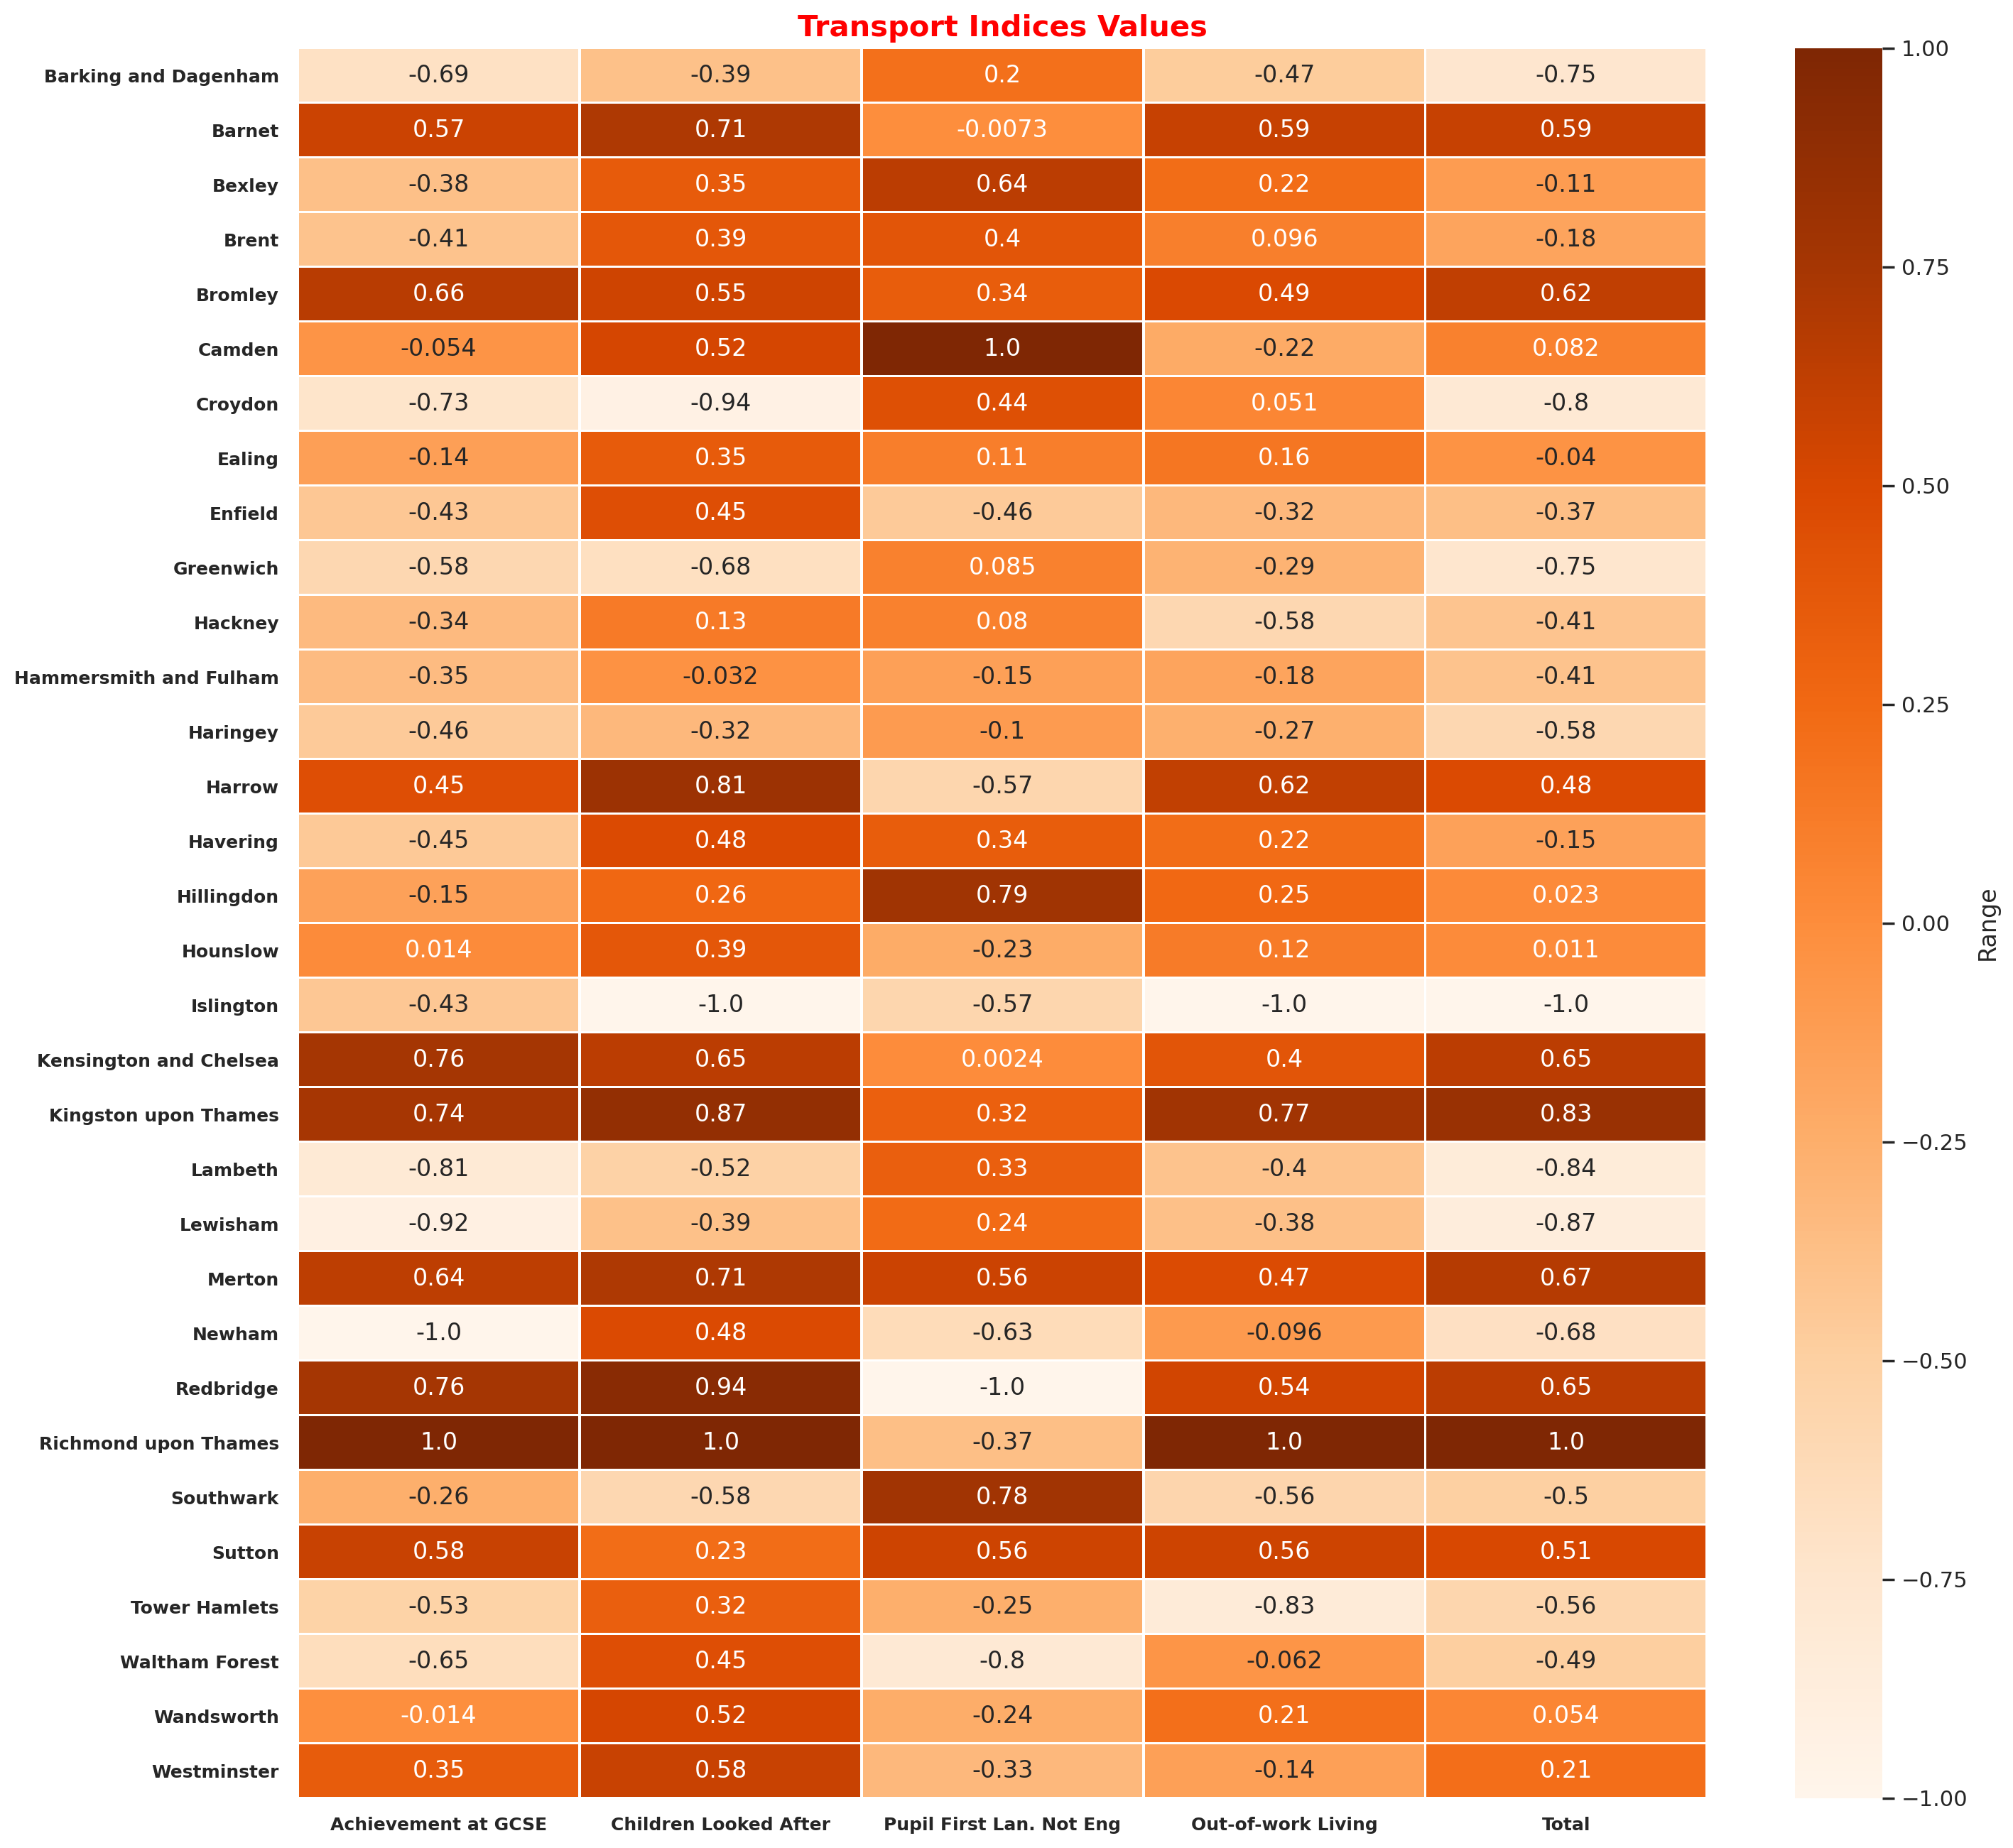

In [93]:
#Resampling Children Criteria
london["CH.Ind_AchGCSE"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,27].values.reshape(-1,1)))
london["CH.Ind_ChiLooAft"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,28].values.reshape(-1,1))*-1)
london["CH.Ind_PupFLNotEng"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,29].values.reshape(-1,1))*-1)
london["CH.Ind_LivOOHou"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london.iloc[:,30].values.reshape(-1,1))*-1)

#Filtering Children columns
col_list_CH= london.columns[london.columns.str.contains('CH_')]
col_list_CH_Ind = london.columns[london.columns.str.contains('CH.Ind')] 

#Creating Children Data Frame
london_CH = london[col_list_CH]
london_CH_Ind = london[col_list_CH_Ind]

#AHP for Children 
london_CH_Ind_Weight = [48.3,24.7,9.4,17.6]
london_CH_Ind["Total"] = ((london_CH_Ind.iloc[:,0]*london_CH_Ind_Weight[0])+
                         (london_CH_Ind.iloc[:,1]*london_CH_Ind_Weight[1])+
                         (london_CH_Ind.iloc[:,2]*london_CH_Ind_Weight[2])+
                         (london_CH_Ind.iloc[:,3]*london_CH_Ind_Weight[3]))

london_CH_Ind["Total"] = (MinMaxScaler(feature_range = (-1,1)).fit_transform(london_CH_Ind.iloc[:,4].values.reshape(-1,1)))


print(round(london_CH_Ind,2))

# Heatmap for Children

plt.figure(figsize=(16,16),dpi=200),
sns.set(font_scale=1)
sns.heatmap(london_CH_Ind,annot=True,fmt=".2", linewidths=1, cmap="Oranges",cbar_kws={'label': 'Range','orientation':'vertical'})
plt.style.use('default')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=9)
plt.xticks([0.5,1.5,2.5,3.5,4.5],["Achievement at GCSE","Children Looked After","Pupil First Lan. Not Eng","Out-of-work Living","Total"],weight="bold",rotation=0,size=9)
plt.title("Transport Indices Values",weight="bold",c="red", fontsize=15)
plt.show()

## Split Dataframe Into Criteria